#  Generative Adversarial Network (GAN) Project

This project focuses on implementing a Generative Adversarial Network (GAN) using the MNIST dataset of handwritten digits. GANs have gained prominence in recent years due to their ability to generate realistic data samples. Our objective is to train a generator network to produce images of digits that are indistinguishable from authentic images, while simultaneously training a discriminator network capable of distinguishing between real and generated images.

### Importing Libraries

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

### Data Loading and Preprocessing

 This section describes the dataset used in the project, which is the MNIST dataset. It also describes the preprocessing steps applied to the dataset, including normalizing the pixel values to be between 0 and 1 and converting the images to tensors. We used the MNIST dataset, which consists of 28x28 grayscale images of handwritten digits. We applied the following preprocessing steps:

    Normalized the pixel values to be between 0 and 1
    Converted the images to tensors


In [4]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=True, download=True, transform=transform), batch_size=64, shuffle=True)

----

 This section describes the architecture of the two models used in the project: the **Discriminator** and the **Generator**. The discriminator is a neural network that takes an image as input and outputs a probability that the image is real. The generator is a neural network that takes a random noise vector as input and produces a synthetic image. We defined two models: a discriminator and a generator.

### Discriminator Model

The discriminator takes either a real or generated image as input and outputs the probability of the image being real.
It mirrors the generator in architecture but includes dropout to prevent overfitting during training and uses the `sigmoid` activation function at the output layer to provide a probability between `0` and `1`, indicating the realness of the input image.

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.linear1 = nn.Linear(784, 512)
        self.leaky_relu1 = nn.LeakyReLU(0.2)
        self.dropout1 = nn.Dropout(0.3)
        self.linear2 = nn.Linear(512, 256)
        self.leaky_relu2 = nn.LeakyReLU(0.2)
        self.dropout2 = nn.Dropout(0.3)
        self.linear3 = nn.Linear(256, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.linear1(x)
        x = self.leaky_relu1(x)
        x = self.dropout1(x)
        x = self.linear2(x)
        x = self.leaky_relu2(x)
        x = self.dropout2(x)
        x = self.linear3(x)
        x = self.sigmoid(x)
        return x

### Generator Model

The generator starts with a random noise vector as input and uses a series of fully connected layers to output a `28x28` image of a digit.  
It consists of three fully connected layers. The first layer takes a `100`-dimensional noise vector and applies the `Leaky ReLU` activation function. This progresses to a second layer with `256` neurons, and finally, the output layer uses the tanh activation function to normalize the outputs between `-1` and `1`.  
The use of `tanh` helps prevent the dying ReLU problem and ensures a stable gradient during training.

In [6]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.linear1 = nn.Linear(100, 256)
        self.leaky_relu1 = nn.LeakyReLU(0.2)
        self.linear2 = nn.Linear(256, 512)
        self.leaky_relu2 = nn.LeakyReLU(0.2)
        self.linear3 = nn.Linear(512, 784)
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.linear1(x)
        x = self.leaky_relu1(x)
        x = self.linear2(x)
        x = self.leaky_relu2(x)
        x = self.linear3(x)
        x = self.tanh(x)
        return x

### Training Process

Both networks are trained using the `binary cross-entropy` loss function. The generator aims to produce images that the discriminator will classify as real. Conversely, the discriminator learns to differentiate real images from the ones created by the generator.  
The training involves alternating between training the discriminator on real and generated images, and updating the generator based on the feedback from the discriminator.  
An `Adam optimizer` is used for both networks, ensuring efficient convergence.

Epoch [1/100]
Before training:


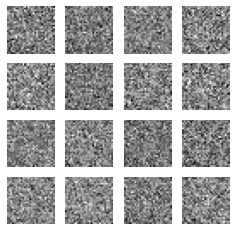

Batch [1/938], D Loss: 1.3848, G Loss: 0.6714
Batch [129/938], D Loss: 0.0241, G Loss: 6.3052
Batch [257/938], D Loss: 0.1626, G Loss: 4.3240
Batch [385/938], D Loss: 0.1111, G Loss: 4.9626
Batch [513/938], D Loss: 0.6020, G Loss: 2.4868
Batch [641/938], D Loss: 1.7770, G Loss: 1.4113
Batch [769/938], D Loss: 0.7682, G Loss: 3.1158
Batch [897/938], D Loss: 0.6837, G Loss: 2.5989
After training:


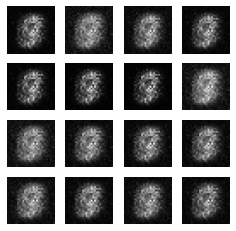


-------------------------------------------------------------

Epoch [2/100]
Before training:


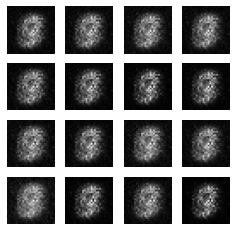

Batch [1/938], D Loss: 1.2615, G Loss: 0.4516
Batch [129/938], D Loss: 0.2673, G Loss: 4.6989
Batch [257/938], D Loss: 0.7528, G Loss: 1.9789
Batch [385/938], D Loss: 0.9313, G Loss: 1.3040
Batch [513/938], D Loss: 0.4275, G Loss: 2.1698
Batch [641/938], D Loss: 0.3133, G Loss: 3.2882
Batch [769/938], D Loss: 1.2037, G Loss: 2.2678
Batch [897/938], D Loss: 1.1381, G Loss: 1.7851
After training:


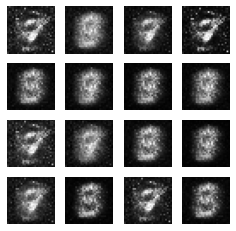


-------------------------------------------------------------

Epoch [3/100]
Before training:


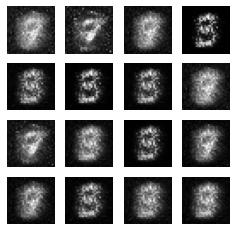

Batch [1/938], D Loss: 1.0730, G Loss: 2.0521
Batch [129/938], D Loss: 0.4032, G Loss: 3.9092
Batch [257/938], D Loss: 0.5727, G Loss: 2.3660
Batch [385/938], D Loss: 1.1196, G Loss: 1.7862
Batch [513/938], D Loss: 0.8677, G Loss: 2.1459
Batch [641/938], D Loss: 0.8533, G Loss: 1.9208
Batch [769/938], D Loss: 1.2931, G Loss: 1.2921
Batch [897/938], D Loss: 0.6310, G Loss: 2.8369
After training:


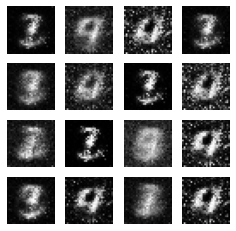


-------------------------------------------------------------

Epoch [4/100]
Before training:


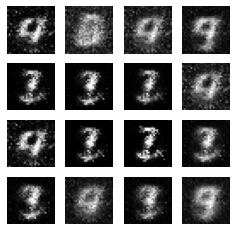

Batch [1/938], D Loss: 0.7078, G Loss: 2.8215
Batch [129/938], D Loss: 0.7510, G Loss: 3.0009
Batch [257/938], D Loss: 1.1289, G Loss: 2.0892
Batch [385/938], D Loss: 0.7659, G Loss: 1.9375
Batch [513/938], D Loss: 1.1704, G Loss: 1.4534
Batch [641/938], D Loss: 0.7857, G Loss: 1.9501
Batch [769/938], D Loss: 0.5619, G Loss: 2.3764
Batch [897/938], D Loss: 0.9853, G Loss: 1.4474
After training:


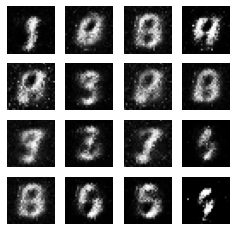


-------------------------------------------------------------

Epoch [5/100]
Before training:


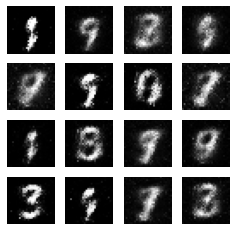

Batch [1/938], D Loss: 1.1784, G Loss: 3.1536
Batch [129/938], D Loss: 0.9486, G Loss: 2.0953
Batch [257/938], D Loss: 1.0152, G Loss: 1.7223
Batch [385/938], D Loss: 1.0089, G Loss: 1.8167
Batch [513/938], D Loss: 1.0301, G Loss: 1.5991
Batch [641/938], D Loss: 1.0281, G Loss: 2.1759
Batch [769/938], D Loss: 0.6954, G Loss: 2.1621
Batch [897/938], D Loss: 0.7304, G Loss: 2.5535
After training:


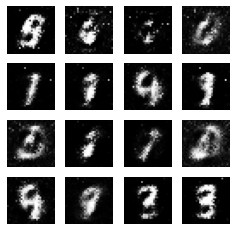


-------------------------------------------------------------

Epoch [6/100]
Before training:


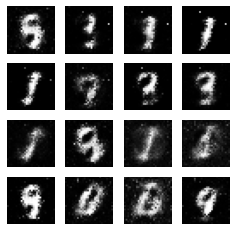

Batch [1/938], D Loss: 0.8289, G Loss: 1.6491
Batch [129/938], D Loss: 0.6226, G Loss: 2.5851
Batch [257/938], D Loss: 0.6470, G Loss: 1.8373
Batch [385/938], D Loss: 0.9670, G Loss: 1.6756
Batch [513/938], D Loss: 0.8900, G Loss: 1.8173
Batch [641/938], D Loss: 0.8478, G Loss: 2.5959
Batch [769/938], D Loss: 0.8684, G Loss: 2.1201
Batch [897/938], D Loss: 0.8843, G Loss: 1.6845
After training:


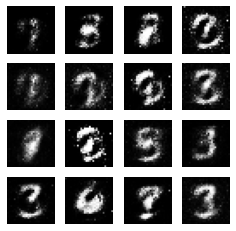


-------------------------------------------------------------

Epoch [7/100]
Before training:


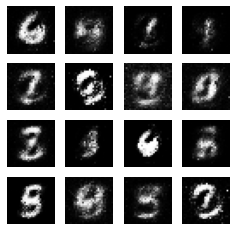

Batch [1/938], D Loss: 0.8419, G Loss: 3.3923
Batch [129/938], D Loss: 0.8940, G Loss: 1.9844
Batch [257/938], D Loss: 0.7810, G Loss: 2.3917
Batch [385/938], D Loss: 0.4608, G Loss: 2.8299
Batch [513/938], D Loss: 0.6227, G Loss: 1.9323
Batch [641/938], D Loss: 0.8223, G Loss: 1.6096
Batch [769/938], D Loss: 0.7505, G Loss: 2.0836
Batch [897/938], D Loss: 0.6209, G Loss: 1.9978
After training:


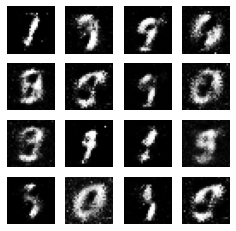


-------------------------------------------------------------

Epoch [8/100]
Before training:


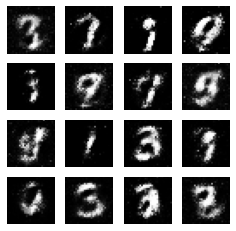

Batch [1/938], D Loss: 0.8487, G Loss: 2.5103
Batch [129/938], D Loss: 0.8706, G Loss: 1.8531
Batch [257/938], D Loss: 0.9862, G Loss: 2.3398
Batch [385/938], D Loss: 1.0140, G Loss: 1.6049
Batch [513/938], D Loss: 0.7637, G Loss: 1.6769
Batch [641/938], D Loss: 0.5752, G Loss: 2.2913
Batch [769/938], D Loss: 1.3351, G Loss: 1.0936
Batch [897/938], D Loss: 0.7796, G Loss: 2.3561
After training:


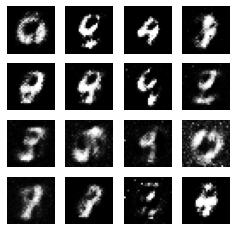


-------------------------------------------------------------

Epoch [9/100]
Before training:


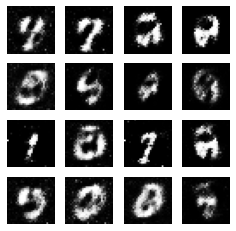

Batch [1/938], D Loss: 0.8365, G Loss: 1.6818
Batch [129/938], D Loss: 1.0771, G Loss: 1.8932
Batch [257/938], D Loss: 1.4439, G Loss: 1.3838
Batch [385/938], D Loss: 1.5837, G Loss: 1.0351
Batch [513/938], D Loss: 1.2932, G Loss: 0.9286
Batch [641/938], D Loss: 1.0750, G Loss: 1.5354
Batch [769/938], D Loss: 1.0145, G Loss: 1.0126
Batch [897/938], D Loss: 1.2809, G Loss: 1.0804
After training:


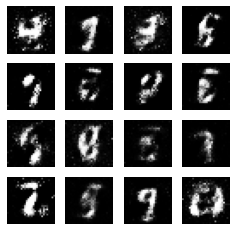


-------------------------------------------------------------

Epoch [10/100]
Before training:


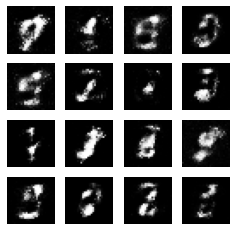

Batch [1/938], D Loss: 1.1268, G Loss: 1.9337
Batch [129/938], D Loss: 0.8977, G Loss: 2.1791
Batch [257/938], D Loss: 1.1690, G Loss: 1.9244
Batch [385/938], D Loss: 0.9597, G Loss: 1.5577
Batch [513/938], D Loss: 0.9960, G Loss: 2.2885
Batch [641/938], D Loss: 1.0743, G Loss: 1.4338
Batch [769/938], D Loss: 1.1617, G Loss: 1.4164
Batch [897/938], D Loss: 1.0856, G Loss: 0.9376
After training:


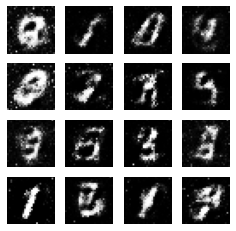


-------------------------------------------------------------

Epoch [11/100]
Before training:


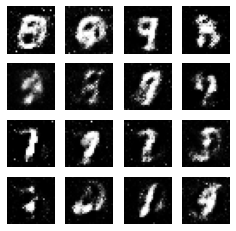

Batch [1/938], D Loss: 0.9965, G Loss: 1.2763
Batch [129/938], D Loss: 0.9295, G Loss: 1.9887
Batch [257/938], D Loss: 1.0271, G Loss: 1.4485
Batch [385/938], D Loss: 0.9122, G Loss: 1.2931
Batch [513/938], D Loss: 1.4508, G Loss: 0.8032
Batch [641/938], D Loss: 0.9658, G Loss: 1.5440
Batch [769/938], D Loss: 1.0579, G Loss: 1.0560
Batch [897/938], D Loss: 0.6794, G Loss: 1.8909
After training:


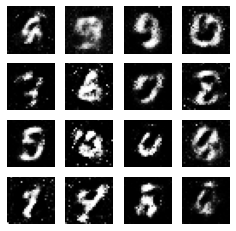


-------------------------------------------------------------

Epoch [12/100]
Before training:


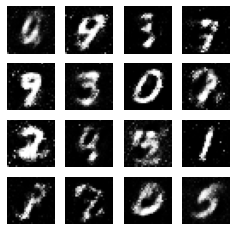

Batch [1/938], D Loss: 0.9195, G Loss: 1.0541
Batch [129/938], D Loss: 0.9650, G Loss: 1.2611
Batch [257/938], D Loss: 1.0781, G Loss: 1.5079
Batch [385/938], D Loss: 0.9967, G Loss: 1.4951
Batch [513/938], D Loss: 1.3554, G Loss: 0.9723
Batch [641/938], D Loss: 0.9085, G Loss: 1.6839
Batch [769/938], D Loss: 0.7991, G Loss: 2.3605
Batch [897/938], D Loss: 1.3785, G Loss: 0.8835
After training:


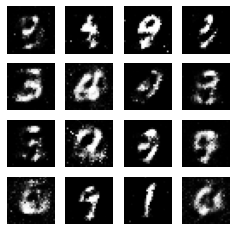


-------------------------------------------------------------

Epoch [13/100]
Before training:


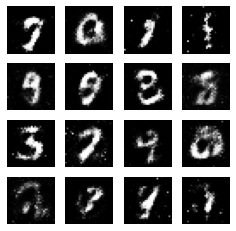

Batch [1/938], D Loss: 1.0417, G Loss: 0.8542
Batch [129/938], D Loss: 0.8123, G Loss: 1.5806
Batch [257/938], D Loss: 1.2683, G Loss: 1.1907
Batch [385/938], D Loss: 1.1635, G Loss: 1.0923
Batch [513/938], D Loss: 1.1423, G Loss: 2.3699
Batch [641/938], D Loss: 1.4147, G Loss: 0.9072
Batch [769/938], D Loss: 1.1429, G Loss: 1.3139
Batch [897/938], D Loss: 1.0131, G Loss: 2.0185
After training:


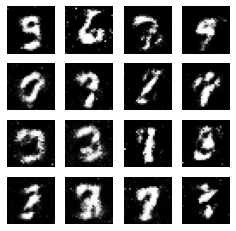


-------------------------------------------------------------

Epoch [14/100]
Before training:


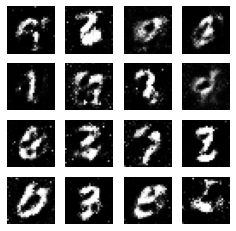

Batch [1/938], D Loss: 0.9040, G Loss: 1.2281
Batch [129/938], D Loss: 1.0049, G Loss: 1.6088
Batch [257/938], D Loss: 1.0579, G Loss: 1.4373
Batch [385/938], D Loss: 0.7933, G Loss: 1.8375
Batch [513/938], D Loss: 1.0290, G Loss: 1.6149
Batch [641/938], D Loss: 1.0648, G Loss: 1.2452
Batch [769/938], D Loss: 1.2049, G Loss: 1.6166
Batch [897/938], D Loss: 0.7507, G Loss: 1.6999
After training:


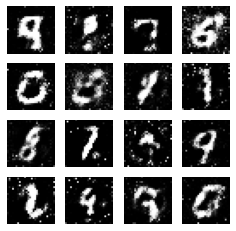


-------------------------------------------------------------

Epoch [15/100]
Before training:


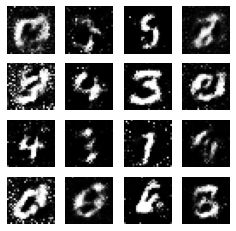

Batch [1/938], D Loss: 0.9794, G Loss: 1.0076
Batch [129/938], D Loss: 1.2588, G Loss: 1.1798
Batch [257/938], D Loss: 1.3794, G Loss: 0.9463
Batch [385/938], D Loss: 1.0534, G Loss: 1.1369
Batch [513/938], D Loss: 0.8291, G Loss: 1.7676
Batch [641/938], D Loss: 1.0236, G Loss: 1.7386
Batch [769/938], D Loss: 0.9483, G Loss: 1.5028
Batch [897/938], D Loss: 1.0181, G Loss: 1.5417
After training:


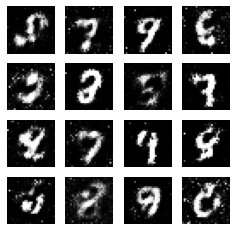


-------------------------------------------------------------

Epoch [16/100]
Before training:


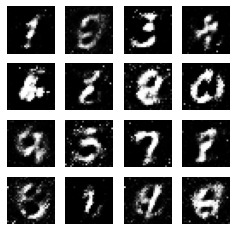

Batch [1/938], D Loss: 1.0346, G Loss: 1.3523
Batch [129/938], D Loss: 1.3480, G Loss: 1.1181
Batch [257/938], D Loss: 1.0607, G Loss: 1.1454
Batch [385/938], D Loss: 0.7615, G Loss: 1.4861
Batch [513/938], D Loss: 1.0319, G Loss: 1.6570
Batch [641/938], D Loss: 1.3117, G Loss: 1.1318
Batch [769/938], D Loss: 1.2174, G Loss: 1.1428
Batch [897/938], D Loss: 1.1766, G Loss: 1.1543
After training:


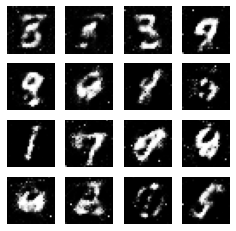


-------------------------------------------------------------

Epoch [17/100]
Before training:


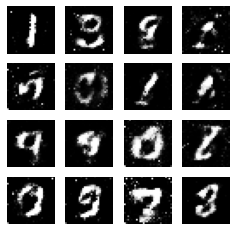

Batch [1/938], D Loss: 1.3512, G Loss: 0.8189
Batch [129/938], D Loss: 0.9101, G Loss: 1.6101
Batch [257/938], D Loss: 1.0350, G Loss: 1.3730
Batch [385/938], D Loss: 0.9572, G Loss: 1.4067
Batch [513/938], D Loss: 1.1667, G Loss: 1.2733
Batch [641/938], D Loss: 0.8457, G Loss: 1.7574
Batch [769/938], D Loss: 1.1470, G Loss: 1.4975
Batch [897/938], D Loss: 0.9524, G Loss: 1.5928
After training:


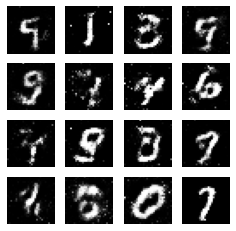


-------------------------------------------------------------

Epoch [18/100]
Before training:


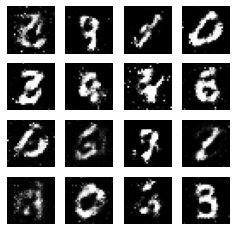

Batch [1/938], D Loss: 1.1019, G Loss: 1.0424
Batch [129/938], D Loss: 1.1445, G Loss: 1.5575
Batch [257/938], D Loss: 0.9349, G Loss: 1.4139
Batch [385/938], D Loss: 0.9268, G Loss: 2.0825
Batch [513/938], D Loss: 0.9660, G Loss: 1.5781
Batch [641/938], D Loss: 1.0908, G Loss: 1.2666
Batch [769/938], D Loss: 1.2999, G Loss: 0.9299
Batch [897/938], D Loss: 0.9007, G Loss: 1.1200
After training:


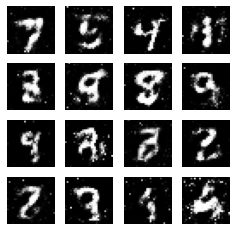


-------------------------------------------------------------

Epoch [19/100]
Before training:


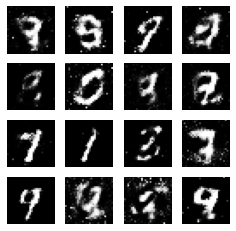

Batch [1/938], D Loss: 1.3450, G Loss: 1.1896
Batch [129/938], D Loss: 0.9223, G Loss: 1.5170
Batch [257/938], D Loss: 0.7249, G Loss: 2.0055
Batch [385/938], D Loss: 1.1432, G Loss: 0.9550
Batch [513/938], D Loss: 1.1850, G Loss: 0.9376
Batch [641/938], D Loss: 0.7595, G Loss: 1.4658
Batch [769/938], D Loss: 0.8466, G Loss: 1.2572
Batch [897/938], D Loss: 1.1680, G Loss: 1.0876
After training:


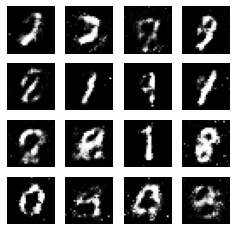


-------------------------------------------------------------

Epoch [20/100]
Before training:


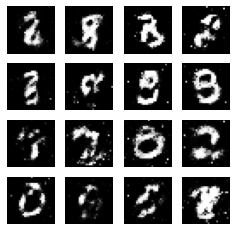

Batch [1/938], D Loss: 0.9834, G Loss: 1.6222
Batch [129/938], D Loss: 0.9527, G Loss: 1.2450
Batch [257/938], D Loss: 1.2300, G Loss: 1.1265
Batch [385/938], D Loss: 1.2909, G Loss: 0.8221
Batch [513/938], D Loss: 1.0663, G Loss: 1.3936
Batch [641/938], D Loss: 1.1931, G Loss: 1.2806
Batch [769/938], D Loss: 1.1004, G Loss: 1.1833
Batch [897/938], D Loss: 0.9306, G Loss: 1.3084
After training:


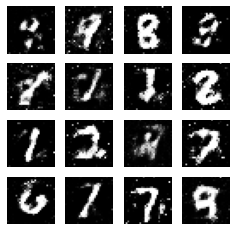


-------------------------------------------------------------

Epoch [21/100]
Before training:


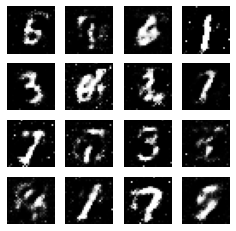

Batch [1/938], D Loss: 1.0363, G Loss: 0.8496
Batch [129/938], D Loss: 1.4154, G Loss: 1.4580
Batch [257/938], D Loss: 1.0221, G Loss: 1.3770
Batch [385/938], D Loss: 0.8953, G Loss: 1.7044
Batch [513/938], D Loss: 0.8939, G Loss: 1.5403
Batch [641/938], D Loss: 1.1647, G Loss: 1.0876
Batch [769/938], D Loss: 1.0295, G Loss: 1.7682
Batch [897/938], D Loss: 0.9864, G Loss: 1.6969
After training:


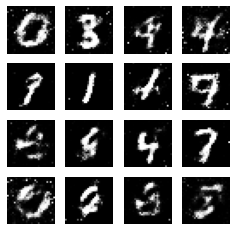


-------------------------------------------------------------

Epoch [22/100]
Before training:


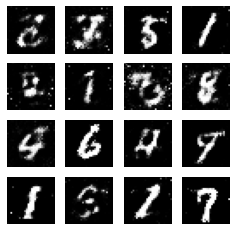

Batch [1/938], D Loss: 1.0307, G Loss: 0.8686
Batch [129/938], D Loss: 0.9944, G Loss: 1.3435
Batch [257/938], D Loss: 0.9197, G Loss: 1.6879
Batch [385/938], D Loss: 0.9362, G Loss: 1.4239
Batch [513/938], D Loss: 1.1335, G Loss: 1.2238
Batch [641/938], D Loss: 1.0074, G Loss: 1.4299
Batch [769/938], D Loss: 1.1357, G Loss: 1.4835
Batch [897/938], D Loss: 1.1884, G Loss: 1.2264
After training:


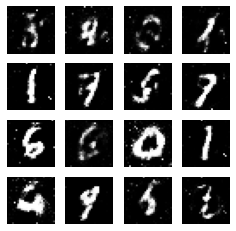


-------------------------------------------------------------

Epoch [23/100]
Before training:


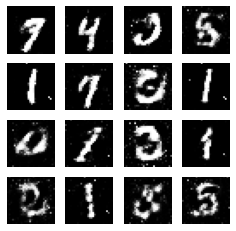

Batch [1/938], D Loss: 0.8255, G Loss: 2.2769
Batch [129/938], D Loss: 0.7631, G Loss: 1.6365
Batch [257/938], D Loss: 1.2781, G Loss: 1.3413
Batch [385/938], D Loss: 0.9846, G Loss: 1.7133
Batch [513/938], D Loss: 1.3262, G Loss: 0.9284
Batch [641/938], D Loss: 1.0845, G Loss: 1.2579
Batch [769/938], D Loss: 0.9230, G Loss: 1.2578
Batch [897/938], D Loss: 0.9587, G Loss: 1.3318
After training:


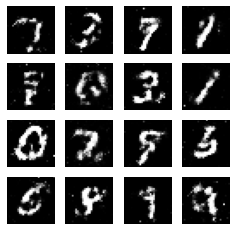


-------------------------------------------------------------

Epoch [24/100]
Before training:


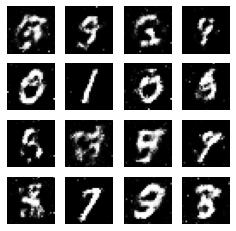

Batch [1/938], D Loss: 1.1112, G Loss: 0.9128
Batch [129/938], D Loss: 1.3264, G Loss: 0.9121
Batch [257/938], D Loss: 1.0462, G Loss: 1.0599
Batch [385/938], D Loss: 0.9741, G Loss: 1.4344
Batch [513/938], D Loss: 0.8774, G Loss: 1.6361
Batch [641/938], D Loss: 1.0439, G Loss: 1.0901
Batch [769/938], D Loss: 1.1712, G Loss: 1.1019
Batch [897/938], D Loss: 0.7284, G Loss: 1.6290
After training:


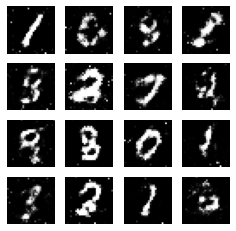


-------------------------------------------------------------

Epoch [25/100]
Before training:


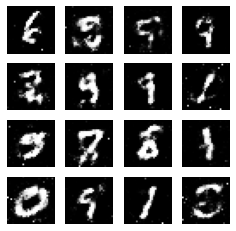

Batch [1/938], D Loss: 0.9347, G Loss: 1.2292
Batch [129/938], D Loss: 1.4154, G Loss: 0.9992
Batch [257/938], D Loss: 0.8598, G Loss: 1.5613
Batch [385/938], D Loss: 0.9822, G Loss: 1.4976
Batch [513/938], D Loss: 1.4102, G Loss: 0.9908
Batch [641/938], D Loss: 1.0020, G Loss: 1.3845
Batch [769/938], D Loss: 0.9895, G Loss: 1.2200
Batch [897/938], D Loss: 1.2043, G Loss: 1.0470
After training:


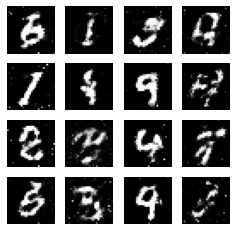


-------------------------------------------------------------

Epoch [26/100]
Before training:


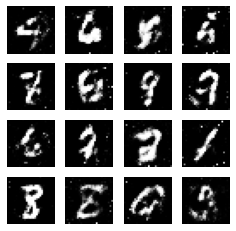

Batch [1/938], D Loss: 1.1063, G Loss: 1.3439
Batch [129/938], D Loss: 0.8611, G Loss: 1.6804
Batch [257/938], D Loss: 1.4418, G Loss: 0.9398
Batch [385/938], D Loss: 1.2696, G Loss: 0.9411
Batch [513/938], D Loss: 1.1137, G Loss: 1.3506
Batch [641/938], D Loss: 0.7398, G Loss: 1.9169
Batch [769/938], D Loss: 1.1806, G Loss: 1.2025
Batch [897/938], D Loss: 1.0634, G Loss: 1.0960
After training:


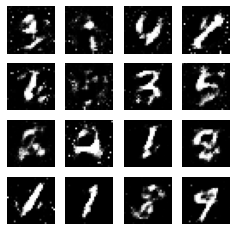


-------------------------------------------------------------

Epoch [27/100]
Before training:


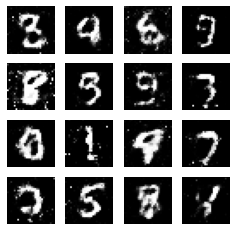

Batch [1/938], D Loss: 1.1746, G Loss: 1.6181
Batch [129/938], D Loss: 0.9769, G Loss: 1.4601
Batch [257/938], D Loss: 0.8747, G Loss: 1.4727
Batch [385/938], D Loss: 1.2358, G Loss: 1.0787
Batch [513/938], D Loss: 0.9866, G Loss: 1.2227
Batch [641/938], D Loss: 0.9371, G Loss: 1.5683
Batch [769/938], D Loss: 1.4116, G Loss: 1.0116
Batch [897/938], D Loss: 1.1188, G Loss: 1.3403
After training:


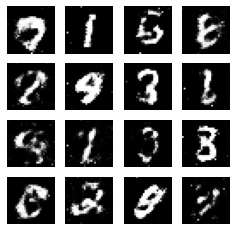


-------------------------------------------------------------

Epoch [28/100]
Before training:


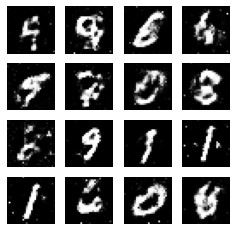

Batch [1/938], D Loss: 1.3136, G Loss: 0.9931
Batch [129/938], D Loss: 0.9582, G Loss: 1.5547
Batch [257/938], D Loss: 1.2690, G Loss: 0.9802
Batch [385/938], D Loss: 1.2669, G Loss: 0.9803
Batch [513/938], D Loss: 1.0458, G Loss: 1.5724
Batch [641/938], D Loss: 1.4745, G Loss: 0.8889
Batch [769/938], D Loss: 1.1949, G Loss: 1.0136
Batch [897/938], D Loss: 1.2534, G Loss: 0.9098
After training:


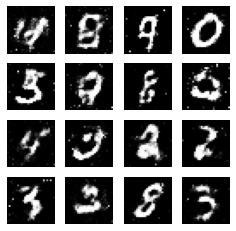


-------------------------------------------------------------

Epoch [29/100]
Before training:


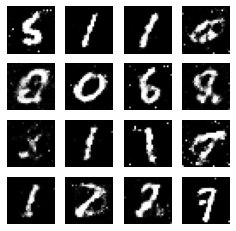

Batch [1/938], D Loss: 1.2293, G Loss: 0.8093
Batch [129/938], D Loss: 1.0404, G Loss: 1.2577
Batch [257/938], D Loss: 1.0325, G Loss: 1.3893
Batch [385/938], D Loss: 1.3154, G Loss: 1.0609
Batch [513/938], D Loss: 0.8984, G Loss: 1.3409
Batch [641/938], D Loss: 0.9790, G Loss: 1.2548
Batch [769/938], D Loss: 1.3394, G Loss: 1.1260
Batch [897/938], D Loss: 1.0147, G Loss: 1.1915
After training:


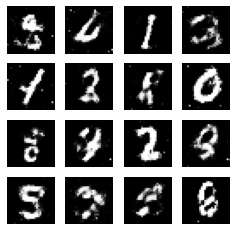


-------------------------------------------------------------

Epoch [30/100]
Before training:


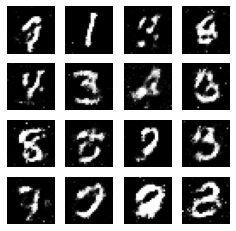

Batch [1/938], D Loss: 1.2252, G Loss: 1.1824
Batch [129/938], D Loss: 1.0002, G Loss: 1.2529
Batch [257/938], D Loss: 1.2430, G Loss: 1.0258
Batch [385/938], D Loss: 0.9296, G Loss: 1.4139
Batch [513/938], D Loss: 0.9911, G Loss: 1.2589
Batch [641/938], D Loss: 1.2569, G Loss: 1.1063
Batch [769/938], D Loss: 1.0150, G Loss: 1.3903
Batch [897/938], D Loss: 0.9696, G Loss: 1.2559
After training:


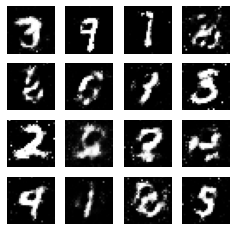


-------------------------------------------------------------

Epoch [31/100]
Before training:


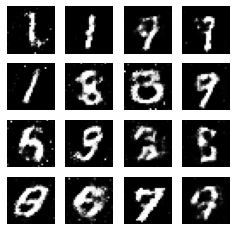

Batch [1/938], D Loss: 1.1824, G Loss: 1.1121
Batch [129/938], D Loss: 0.8762, G Loss: 1.6300
Batch [257/938], D Loss: 1.2014, G Loss: 1.2426
Batch [385/938], D Loss: 1.3358, G Loss: 0.8554
Batch [513/938], D Loss: 1.2596, G Loss: 1.1262
Batch [641/938], D Loss: 0.8711, G Loss: 1.6709
Batch [769/938], D Loss: 1.4036, G Loss: 0.8796
Batch [897/938], D Loss: 1.1817, G Loss: 1.0745
After training:


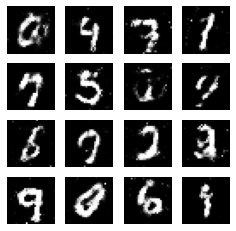


-------------------------------------------------------------

Epoch [32/100]
Before training:


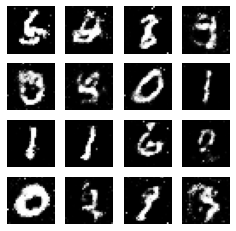

Batch [1/938], D Loss: 1.2122, G Loss: 1.2551
Batch [129/938], D Loss: 1.0550, G Loss: 1.3659
Batch [257/938], D Loss: 1.3350, G Loss: 0.9210
Batch [385/938], D Loss: 1.0169, G Loss: 1.1880
Batch [513/938], D Loss: 0.9323, G Loss: 1.4009
Batch [641/938], D Loss: 1.4338, G Loss: 1.1539
Batch [769/938], D Loss: 1.3943, G Loss: 0.7496
Batch [897/938], D Loss: 0.9980, G Loss: 1.3644
After training:


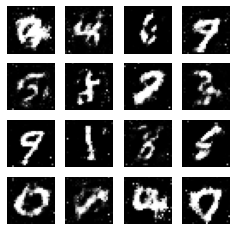


-------------------------------------------------------------

Epoch [33/100]
Before training:


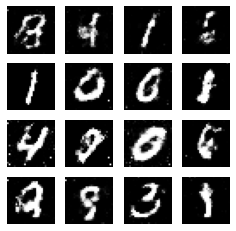

Batch [1/938], D Loss: 1.0125, G Loss: 1.4555
Batch [129/938], D Loss: 0.9230, G Loss: 1.2969
Batch [257/938], D Loss: 0.9667, G Loss: 1.3105
Batch [385/938], D Loss: 1.1258, G Loss: 1.3035
Batch [513/938], D Loss: 1.0411, G Loss: 1.2546
Batch [641/938], D Loss: 1.0831, G Loss: 1.1204
Batch [769/938], D Loss: 1.2769, G Loss: 1.0114
Batch [897/938], D Loss: 1.1673, G Loss: 1.3279
After training:


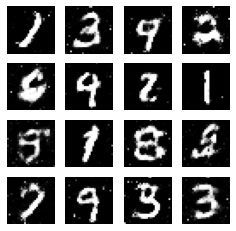


-------------------------------------------------------------

Epoch [34/100]
Before training:


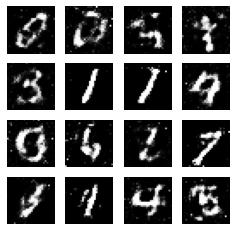

Batch [1/938], D Loss: 1.2206, G Loss: 1.0382
Batch [129/938], D Loss: 1.1775, G Loss: 1.3562
Batch [257/938], D Loss: 1.0878, G Loss: 1.3972
Batch [385/938], D Loss: 1.3498, G Loss: 1.1135
Batch [513/938], D Loss: 1.2195, G Loss: 1.0959
Batch [641/938], D Loss: 0.9345, G Loss: 1.3037
Batch [769/938], D Loss: 1.2189, G Loss: 1.1005
Batch [897/938], D Loss: 1.4166, G Loss: 1.0213
After training:


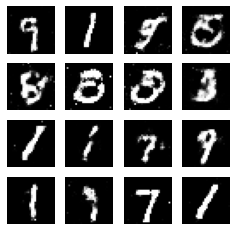


-------------------------------------------------------------

Epoch [35/100]
Before training:


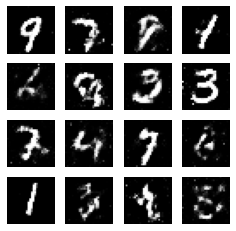

Batch [1/938], D Loss: 1.2366, G Loss: 1.1416
Batch [129/938], D Loss: 0.9698, G Loss: 1.4935
Batch [257/938], D Loss: 1.4077, G Loss: 1.0023
Batch [385/938], D Loss: 1.2606, G Loss: 1.0130
Batch [513/938], D Loss: 1.1821, G Loss: 1.1927
Batch [641/938], D Loss: 1.1809, G Loss: 1.1198
Batch [769/938], D Loss: 1.1918, G Loss: 1.1000
Batch [897/938], D Loss: 1.0705, G Loss: 1.3045
After training:


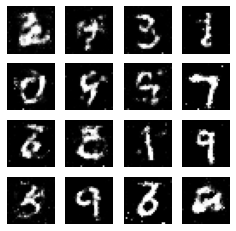


-------------------------------------------------------------

Epoch [36/100]
Before training:


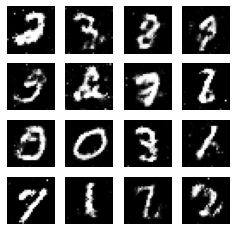

Batch [1/938], D Loss: 1.0546, G Loss: 1.4928
Batch [129/938], D Loss: 1.1155, G Loss: 1.3972
Batch [257/938], D Loss: 1.2710, G Loss: 1.2563
Batch [385/938], D Loss: 1.0182, G Loss: 1.2398
Batch [513/938], D Loss: 1.2828, G Loss: 0.8172
Batch [641/938], D Loss: 1.0753, G Loss: 1.0497
Batch [769/938], D Loss: 0.8765, G Loss: 1.3322
Batch [897/938], D Loss: 1.1862, G Loss: 1.0415
After training:


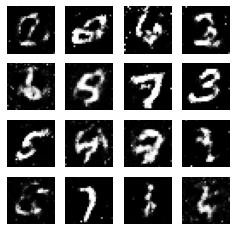


-------------------------------------------------------------

Epoch [37/100]
Before training:


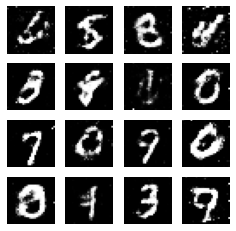

Batch [1/938], D Loss: 0.8697, G Loss: 1.2229
Batch [129/938], D Loss: 1.0959, G Loss: 1.2592
Batch [257/938], D Loss: 0.9353, G Loss: 1.3298
Batch [385/938], D Loss: 1.0009, G Loss: 1.4843
Batch [513/938], D Loss: 1.3476, G Loss: 1.0081
Batch [641/938], D Loss: 1.3713, G Loss: 0.8482
Batch [769/938], D Loss: 1.2317, G Loss: 1.1981
Batch [897/938], D Loss: 1.0570, G Loss: 1.1717
After training:


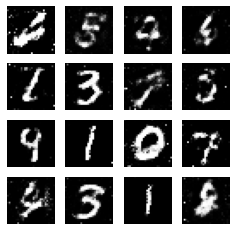


-------------------------------------------------------------

Epoch [38/100]
Before training:


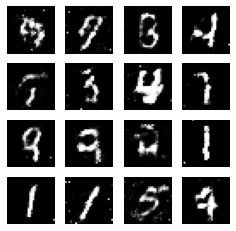

Batch [1/938], D Loss: 1.2471, G Loss: 1.0688
Batch [129/938], D Loss: 1.1818, G Loss: 1.1552
Batch [257/938], D Loss: 1.0569, G Loss: 1.1413
Batch [385/938], D Loss: 1.1524, G Loss: 1.3113
Batch [513/938], D Loss: 1.1404, G Loss: 1.0513
Batch [641/938], D Loss: 1.3805, G Loss: 0.9387
Batch [769/938], D Loss: 1.0233, G Loss: 1.4244
Batch [897/938], D Loss: 1.1521, G Loss: 1.0176
After training:


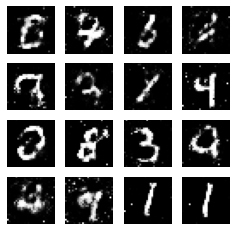


-------------------------------------------------------------

Epoch [39/100]
Before training:


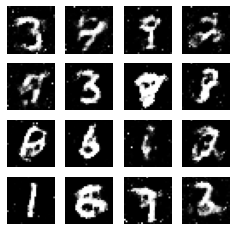

Batch [1/938], D Loss: 1.2065, G Loss: 1.0176
Batch [129/938], D Loss: 1.2106, G Loss: 1.0214
Batch [257/938], D Loss: 1.2714, G Loss: 1.0036
Batch [385/938], D Loss: 1.2805, G Loss: 1.3291
Batch [513/938], D Loss: 1.2258, G Loss: 1.1444
Batch [641/938], D Loss: 1.0829, G Loss: 1.0989
Batch [769/938], D Loss: 1.0395, G Loss: 1.1481
Batch [897/938], D Loss: 1.1423, G Loss: 1.2443
After training:


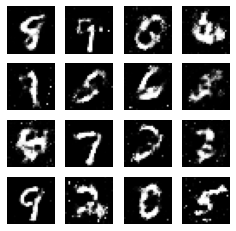


-------------------------------------------------------------

Epoch [40/100]
Before training:


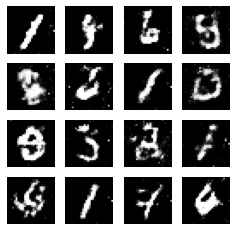

Batch [1/938], D Loss: 0.9475, G Loss: 1.3234
Batch [129/938], D Loss: 1.2276, G Loss: 0.9584
Batch [257/938], D Loss: 0.9954, G Loss: 1.1510
Batch [385/938], D Loss: 1.0559, G Loss: 1.2097
Batch [513/938], D Loss: 1.0748, G Loss: 1.2204
Batch [641/938], D Loss: 1.2570, G Loss: 0.8274
Batch [769/938], D Loss: 0.9946, G Loss: 1.1992
Batch [897/938], D Loss: 1.0058, G Loss: 1.0638
After training:


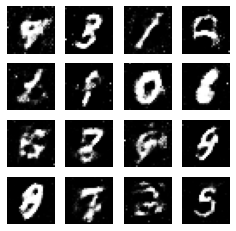


-------------------------------------------------------------

Epoch [41/100]
Before training:


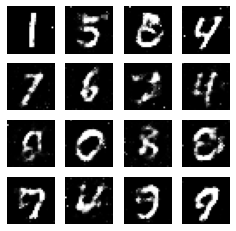

Batch [1/938], D Loss: 1.2110, G Loss: 1.1206
Batch [129/938], D Loss: 0.9993, G Loss: 1.2543
Batch [257/938], D Loss: 1.3494, G Loss: 1.1320
Batch [385/938], D Loss: 1.3432, G Loss: 1.0150
Batch [513/938], D Loss: 1.0818, G Loss: 1.3478
Batch [641/938], D Loss: 1.2232, G Loss: 1.1719
Batch [769/938], D Loss: 1.3493, G Loss: 0.8807
Batch [897/938], D Loss: 1.0212, G Loss: 1.3667
After training:


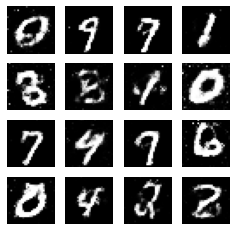


-------------------------------------------------------------

Epoch [42/100]
Before training:


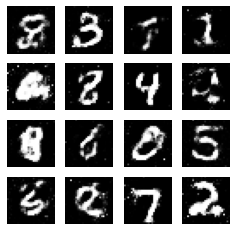

Batch [1/938], D Loss: 1.1576, G Loss: 1.2119
Batch [129/938], D Loss: 1.2312, G Loss: 1.1494
Batch [257/938], D Loss: 1.2819, G Loss: 1.0581
Batch [385/938], D Loss: 1.1304, G Loss: 1.2942
Batch [513/938], D Loss: 1.2076, G Loss: 0.9350
Batch [641/938], D Loss: 1.1534, G Loss: 1.2511
Batch [769/938], D Loss: 1.1852, G Loss: 1.1547
Batch [897/938], D Loss: 1.1265, G Loss: 0.8801
After training:


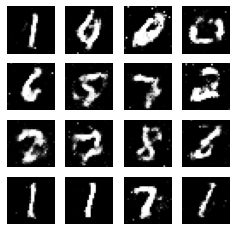


-------------------------------------------------------------

Epoch [43/100]
Before training:


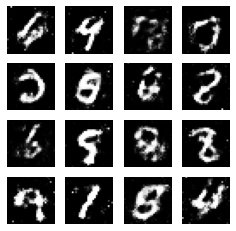

Batch [1/938], D Loss: 1.0480, G Loss: 1.0665
Batch [129/938], D Loss: 1.2702, G Loss: 0.9843
Batch [257/938], D Loss: 0.9547, G Loss: 1.4055
Batch [385/938], D Loss: 1.0213, G Loss: 1.4161
Batch [513/938], D Loss: 1.1980, G Loss: 0.9670
Batch [641/938], D Loss: 1.1677, G Loss: 1.0009
Batch [769/938], D Loss: 0.9928, G Loss: 1.3229
Batch [897/938], D Loss: 1.0566, G Loss: 1.1516
After training:


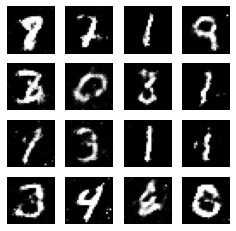


-------------------------------------------------------------

Epoch [44/100]
Before training:


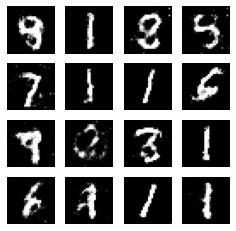

Batch [1/938], D Loss: 1.0096, G Loss: 1.2194
Batch [129/938], D Loss: 1.1860, G Loss: 0.8751
Batch [257/938], D Loss: 1.0248, G Loss: 1.1865
Batch [385/938], D Loss: 1.0461, G Loss: 1.0683
Batch [513/938], D Loss: 0.9226, G Loss: 1.1607
Batch [641/938], D Loss: 1.2740, G Loss: 1.0928
Batch [769/938], D Loss: 1.0379, G Loss: 1.3049
Batch [897/938], D Loss: 1.0826, G Loss: 1.1944
After training:


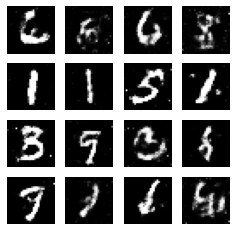


-------------------------------------------------------------

Epoch [45/100]
Before training:


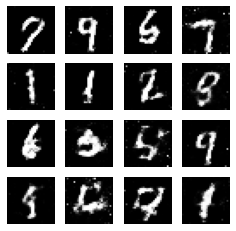

Batch [1/938], D Loss: 1.0005, G Loss: 1.2149
Batch [129/938], D Loss: 1.3461, G Loss: 1.1869
Batch [257/938], D Loss: 1.2099, G Loss: 1.0187
Batch [385/938], D Loss: 1.1245, G Loss: 1.2319
Batch [513/938], D Loss: 1.1287, G Loss: 1.1949
Batch [641/938], D Loss: 1.0937, G Loss: 1.3870
Batch [769/938], D Loss: 1.3742, G Loss: 0.8610
Batch [897/938], D Loss: 1.1729, G Loss: 1.0165
After training:


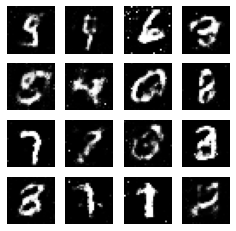


-------------------------------------------------------------

Epoch [46/100]
Before training:


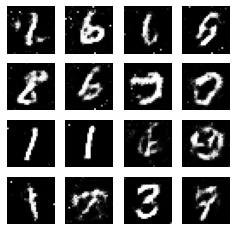

Batch [1/938], D Loss: 1.2615, G Loss: 1.1961
Batch [129/938], D Loss: 1.0946, G Loss: 1.2211
Batch [257/938], D Loss: 1.0910, G Loss: 1.4736
Batch [385/938], D Loss: 1.0978, G Loss: 1.0607
Batch [513/938], D Loss: 1.2049, G Loss: 1.0101
Batch [641/938], D Loss: 1.1409, G Loss: 1.2360
Batch [769/938], D Loss: 1.1106, G Loss: 1.1294
Batch [897/938], D Loss: 1.2248, G Loss: 1.0996
After training:


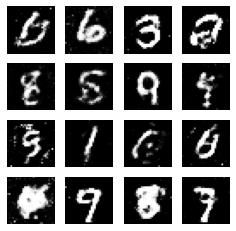


-------------------------------------------------------------

Epoch [47/100]
Before training:


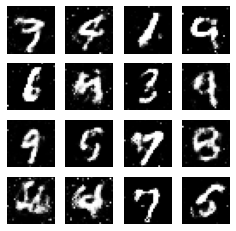

Batch [1/938], D Loss: 1.1918, G Loss: 1.4357
Batch [129/938], D Loss: 1.1194, G Loss: 1.2161
Batch [257/938], D Loss: 1.0960, G Loss: 0.9771
Batch [385/938], D Loss: 1.1184, G Loss: 1.4244
Batch [513/938], D Loss: 1.2673, G Loss: 0.9266
Batch [641/938], D Loss: 1.1233, G Loss: 1.1952
Batch [769/938], D Loss: 0.9676, G Loss: 1.3998
Batch [897/938], D Loss: 0.9085, G Loss: 1.4690
After training:


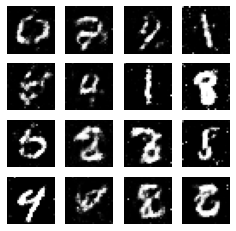


-------------------------------------------------------------

Epoch [48/100]
Before training:


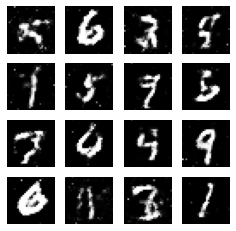

Batch [1/938], D Loss: 1.1503, G Loss: 1.2295
Batch [129/938], D Loss: 1.1263, G Loss: 0.9611
Batch [257/938], D Loss: 0.9148, G Loss: 1.4114
Batch [385/938], D Loss: 1.2174, G Loss: 1.1395
Batch [513/938], D Loss: 0.9828, G Loss: 1.2102
Batch [641/938], D Loss: 1.1602, G Loss: 1.2594
Batch [769/938], D Loss: 1.1264, G Loss: 1.0501
Batch [897/938], D Loss: 1.1372, G Loss: 0.9732
After training:


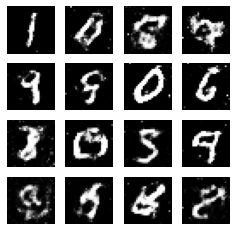


-------------------------------------------------------------

Epoch [49/100]
Before training:


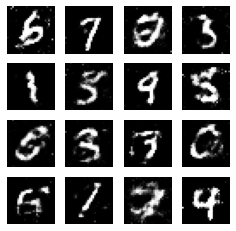

Batch [1/938], D Loss: 1.0835, G Loss: 0.9813
Batch [129/938], D Loss: 1.2862, G Loss: 0.9151
Batch [257/938], D Loss: 1.2715, G Loss: 1.1963
Batch [385/938], D Loss: 1.3079, G Loss: 1.1679
Batch [513/938], D Loss: 1.2958, G Loss: 0.9046
Batch [641/938], D Loss: 1.0522, G Loss: 1.3259
Batch [769/938], D Loss: 1.2660, G Loss: 1.0047
Batch [897/938], D Loss: 1.1260, G Loss: 1.2994
After training:


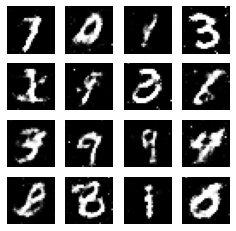


-------------------------------------------------------------

Epoch [50/100]
Before training:


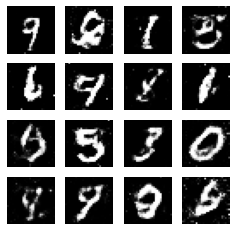

Batch [1/938], D Loss: 1.2404, G Loss: 0.9619
Batch [129/938], D Loss: 1.3626, G Loss: 1.1467
Batch [257/938], D Loss: 1.2188, G Loss: 0.8964
Batch [385/938], D Loss: 1.2021, G Loss: 1.1188
Batch [513/938], D Loss: 1.0411, G Loss: 1.2144
Batch [641/938], D Loss: 1.1383, G Loss: 1.0072
Batch [769/938], D Loss: 0.9795, G Loss: 1.1442
Batch [897/938], D Loss: 1.2843, G Loss: 1.2556
After training:


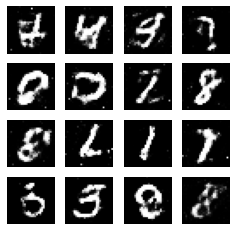


-------------------------------------------------------------

Epoch [51/100]
Before training:


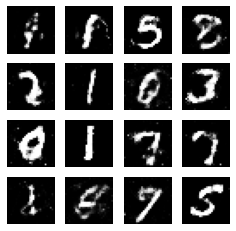

Batch [1/938], D Loss: 1.1211, G Loss: 1.2154
Batch [129/938], D Loss: 1.2830, G Loss: 0.9772
Batch [257/938], D Loss: 1.0436, G Loss: 1.2668
Batch [385/938], D Loss: 1.2067, G Loss: 0.9475
Batch [513/938], D Loss: 1.0736, G Loss: 1.0617
Batch [641/938], D Loss: 1.0717, G Loss: 1.1159
Batch [769/938], D Loss: 1.1891, G Loss: 1.1206
Batch [897/938], D Loss: 1.2334, G Loss: 0.9489
After training:


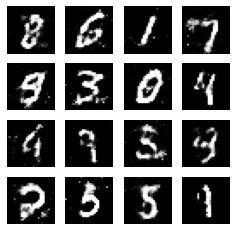


-------------------------------------------------------------

Epoch [52/100]
Before training:


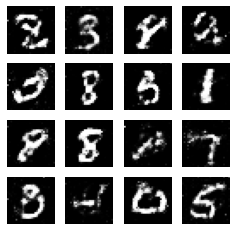

Batch [1/938], D Loss: 1.1405, G Loss: 1.1620
Batch [129/938], D Loss: 1.1523, G Loss: 1.2515
Batch [257/938], D Loss: 1.1001, G Loss: 1.1617
Batch [385/938], D Loss: 1.1418, G Loss: 1.2142
Batch [513/938], D Loss: 1.1908, G Loss: 1.0635
Batch [641/938], D Loss: 1.1996, G Loss: 1.0749
Batch [769/938], D Loss: 1.2370, G Loss: 1.2272
Batch [897/938], D Loss: 1.1789, G Loss: 1.1607
After training:


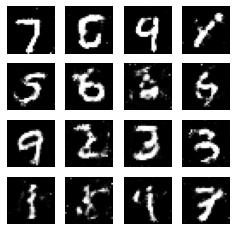


-------------------------------------------------------------

Epoch [53/100]
Before training:


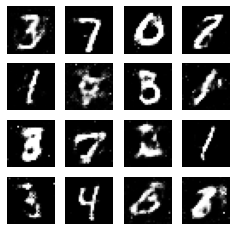

Batch [1/938], D Loss: 1.0856, G Loss: 1.0165
Batch [129/938], D Loss: 1.0065, G Loss: 1.1544
Batch [257/938], D Loss: 1.2714, G Loss: 0.9131
Batch [385/938], D Loss: 1.2409, G Loss: 1.0329
Batch [513/938], D Loss: 0.9912, G Loss: 1.2705
Batch [641/938], D Loss: 1.2252, G Loss: 0.9954
Batch [769/938], D Loss: 1.2397, G Loss: 0.9512
Batch [897/938], D Loss: 1.3281, G Loss: 1.0854
After training:


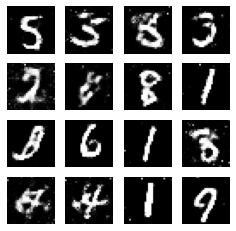


-------------------------------------------------------------

Epoch [54/100]
Before training:


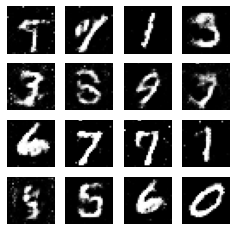

Batch [1/938], D Loss: 1.2981, G Loss: 1.0891
Batch [129/938], D Loss: 1.4469, G Loss: 0.9115
Batch [257/938], D Loss: 1.0889, G Loss: 1.2641
Batch [385/938], D Loss: 1.0147, G Loss: 1.4075
Batch [513/938], D Loss: 1.0741, G Loss: 1.2122
Batch [641/938], D Loss: 1.4852, G Loss: 0.9475
Batch [769/938], D Loss: 1.2569, G Loss: 0.8792
Batch [897/938], D Loss: 1.0836, G Loss: 0.9760
After training:


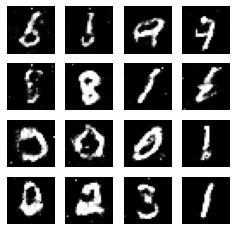


-------------------------------------------------------------

Epoch [55/100]
Before training:


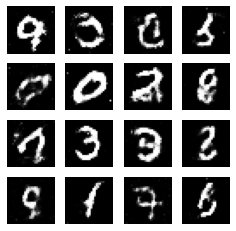

Batch [1/938], D Loss: 1.1068, G Loss: 1.0737
Batch [129/938], D Loss: 1.3742, G Loss: 1.1065
Batch [257/938], D Loss: 0.9499, G Loss: 1.3253
Batch [385/938], D Loss: 1.1692, G Loss: 1.1477
Batch [513/938], D Loss: 1.2999, G Loss: 1.0753
Batch [641/938], D Loss: 1.3068, G Loss: 0.9402
Batch [769/938], D Loss: 1.0273, G Loss: 1.0816
Batch [897/938], D Loss: 1.0741, G Loss: 1.1867
After training:


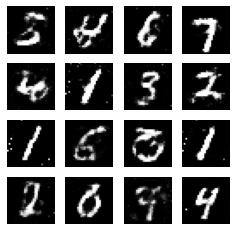


-------------------------------------------------------------

Epoch [56/100]
Before training:


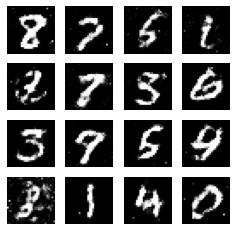

Batch [1/938], D Loss: 1.0313, G Loss: 1.2253
Batch [129/938], D Loss: 1.3409, G Loss: 1.0515
Batch [257/938], D Loss: 1.2092, G Loss: 1.0403
Batch [385/938], D Loss: 1.0507, G Loss: 1.3931
Batch [513/938], D Loss: 1.3031, G Loss: 0.9085
Batch [641/938], D Loss: 1.1208, G Loss: 1.0140
Batch [769/938], D Loss: 1.1296, G Loss: 1.1155
Batch [897/938], D Loss: 1.2957, G Loss: 1.0740
After training:


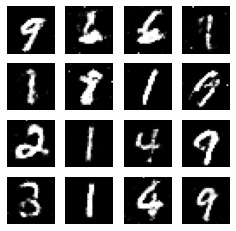


-------------------------------------------------------------

Epoch [57/100]
Before training:


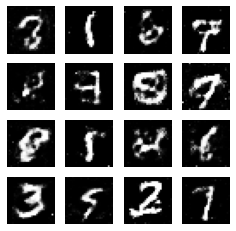

Batch [1/938], D Loss: 1.2195, G Loss: 1.1701
Batch [129/938], D Loss: 1.1246, G Loss: 1.1128
Batch [257/938], D Loss: 1.1798, G Loss: 0.9520
Batch [385/938], D Loss: 1.2085, G Loss: 1.1933
Batch [513/938], D Loss: 1.1586, G Loss: 1.0431
Batch [641/938], D Loss: 1.1516, G Loss: 1.1719
Batch [769/938], D Loss: 1.2192, G Loss: 1.2011
Batch [897/938], D Loss: 1.0955, G Loss: 1.0366
After training:


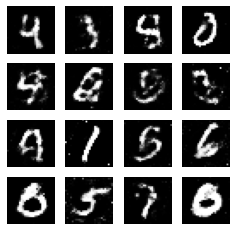


-------------------------------------------------------------

Epoch [58/100]
Before training:


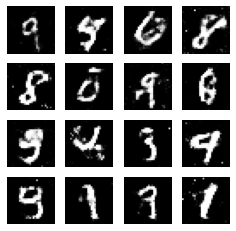

Batch [1/938], D Loss: 1.0215, G Loss: 1.2810
Batch [129/938], D Loss: 1.4283, G Loss: 1.0515
Batch [257/938], D Loss: 1.2623, G Loss: 0.9047
Batch [385/938], D Loss: 1.0611, G Loss: 1.2070
Batch [513/938], D Loss: 1.2350, G Loss: 1.0797
Batch [641/938], D Loss: 1.0980, G Loss: 0.8596
Batch [769/938], D Loss: 1.1513, G Loss: 1.0245
Batch [897/938], D Loss: 1.1095, G Loss: 1.2447
After training:


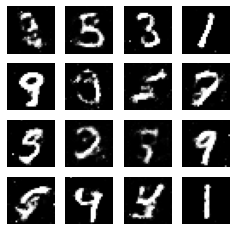


-------------------------------------------------------------

Epoch [59/100]
Before training:


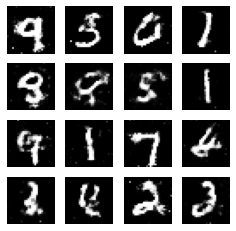

Batch [1/938], D Loss: 1.1521, G Loss: 1.1431
Batch [129/938], D Loss: 1.1602, G Loss: 0.9654
Batch [257/938], D Loss: 1.1967, G Loss: 1.0118
Batch [385/938], D Loss: 1.0323, G Loss: 1.0595
Batch [513/938], D Loss: 1.3416, G Loss: 0.9467
Batch [641/938], D Loss: 1.2287, G Loss: 1.2148
Batch [769/938], D Loss: 1.3271, G Loss: 0.9085
Batch [897/938], D Loss: 0.9650, G Loss: 1.3663
After training:


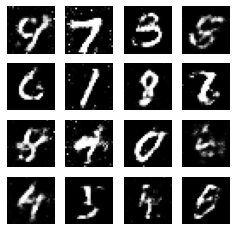


-------------------------------------------------------------

Epoch [60/100]
Before training:


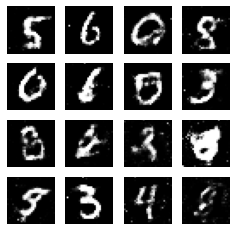

Batch [1/938], D Loss: 1.1815, G Loss: 1.0832
Batch [129/938], D Loss: 1.3611, G Loss: 0.9169
Batch [257/938], D Loss: 1.3035, G Loss: 0.9881
Batch [385/938], D Loss: 1.0043, G Loss: 1.4805
Batch [513/938], D Loss: 1.1919, G Loss: 1.1823
Batch [641/938], D Loss: 1.1397, G Loss: 1.1528
Batch [769/938], D Loss: 1.1936, G Loss: 1.0219
Batch [897/938], D Loss: 1.2345, G Loss: 0.9412
After training:


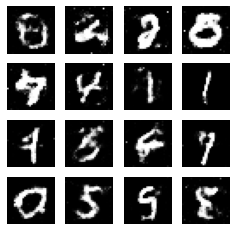


-------------------------------------------------------------

Epoch [61/100]
Before training:


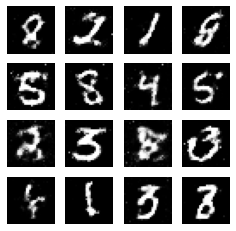

Batch [1/938], D Loss: 1.1316, G Loss: 1.0780
Batch [129/938], D Loss: 1.2011, G Loss: 0.9436
Batch [257/938], D Loss: 1.1582, G Loss: 0.9671
Batch [385/938], D Loss: 1.0010, G Loss: 1.1611
Batch [513/938], D Loss: 1.3356, G Loss: 0.9404
Batch [641/938], D Loss: 1.2061, G Loss: 1.0642
Batch [769/938], D Loss: 1.1510, G Loss: 1.1984
Batch [897/938], D Loss: 1.1651, G Loss: 0.8830
After training:


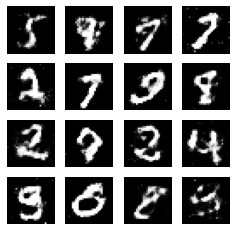


-------------------------------------------------------------

Epoch [62/100]
Before training:


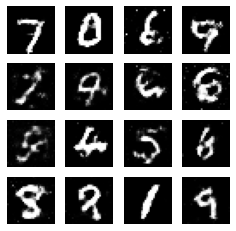

Batch [1/938], D Loss: 1.1913, G Loss: 1.1243
Batch [129/938], D Loss: 1.1485, G Loss: 1.2109
Batch [257/938], D Loss: 1.2161, G Loss: 0.9983
Batch [385/938], D Loss: 1.0862, G Loss: 1.1120
Batch [513/938], D Loss: 1.0133, G Loss: 1.1728
Batch [641/938], D Loss: 1.0931, G Loss: 1.1402
Batch [769/938], D Loss: 1.2306, G Loss: 0.8294
Batch [897/938], D Loss: 1.1696, G Loss: 1.1057
After training:


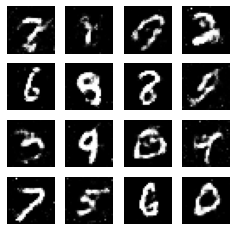


-------------------------------------------------------------

Epoch [63/100]
Before training:


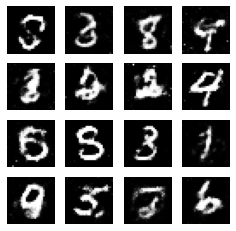

Batch [1/938], D Loss: 1.1277, G Loss: 0.9625
Batch [129/938], D Loss: 1.1283, G Loss: 1.3075
Batch [257/938], D Loss: 0.9881, G Loss: 1.2789
Batch [385/938], D Loss: 1.0539, G Loss: 1.0426
Batch [513/938], D Loss: 1.1761, G Loss: 1.0107
Batch [641/938], D Loss: 1.1022, G Loss: 0.9999
Batch [769/938], D Loss: 1.1146, G Loss: 1.2037
Batch [897/938], D Loss: 1.4262, G Loss: 0.9681
After training:


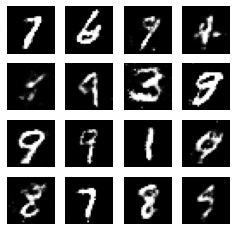


-------------------------------------------------------------

Epoch [64/100]
Before training:


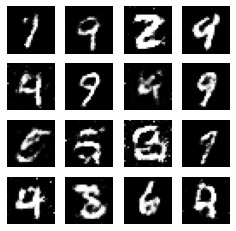

Batch [1/938], D Loss: 1.3064, G Loss: 1.2151
Batch [129/938], D Loss: 1.1486, G Loss: 1.0509
Batch [257/938], D Loss: 1.1549, G Loss: 1.1778
Batch [385/938], D Loss: 1.2449, G Loss: 1.0058
Batch [513/938], D Loss: 1.4677, G Loss: 0.9048
Batch [641/938], D Loss: 1.0605, G Loss: 0.9855
Batch [769/938], D Loss: 1.1549, G Loss: 1.0965
Batch [897/938], D Loss: 1.1618, G Loss: 1.1242
After training:


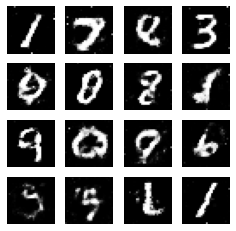


-------------------------------------------------------------

Epoch [65/100]
Before training:


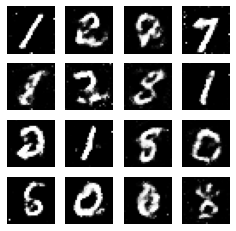

Batch [1/938], D Loss: 1.0328, G Loss: 1.1420
Batch [129/938], D Loss: 1.2103, G Loss: 0.9228
Batch [257/938], D Loss: 1.0435, G Loss: 1.1991
Batch [385/938], D Loss: 1.1839, G Loss: 1.1453
Batch [513/938], D Loss: 1.3866, G Loss: 0.9502
Batch [641/938], D Loss: 1.1531, G Loss: 0.9845
Batch [769/938], D Loss: 1.0608, G Loss: 1.1110
Batch [897/938], D Loss: 1.1157, G Loss: 1.0624
After training:


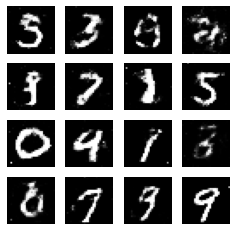


-------------------------------------------------------------

Epoch [66/100]
Before training:


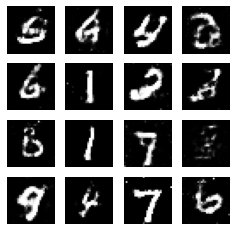

Batch [1/938], D Loss: 1.2796, G Loss: 1.0754
Batch [129/938], D Loss: 1.3830, G Loss: 0.9446
Batch [257/938], D Loss: 1.2488, G Loss: 0.9992
Batch [385/938], D Loss: 1.2003, G Loss: 1.1758
Batch [513/938], D Loss: 1.1264, G Loss: 0.9108
Batch [641/938], D Loss: 1.1672, G Loss: 1.0316
Batch [769/938], D Loss: 1.1785, G Loss: 1.1481
Batch [897/938], D Loss: 1.2969, G Loss: 0.8961
After training:


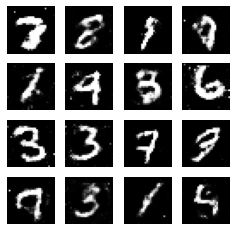


-------------------------------------------------------------

Epoch [67/100]
Before training:


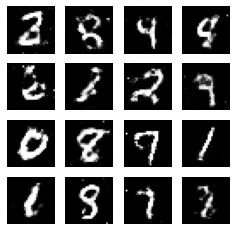

Batch [1/938], D Loss: 1.2587, G Loss: 0.9155
Batch [129/938], D Loss: 0.9536, G Loss: 1.1404
Batch [257/938], D Loss: 1.3253, G Loss: 1.1285
Batch [385/938], D Loss: 1.1201, G Loss: 0.9607
Batch [513/938], D Loss: 1.1827, G Loss: 1.0796
Batch [641/938], D Loss: 1.4745, G Loss: 1.1505
Batch [769/938], D Loss: 1.3018, G Loss: 1.1985
Batch [897/938], D Loss: 1.2710, G Loss: 1.0712
After training:


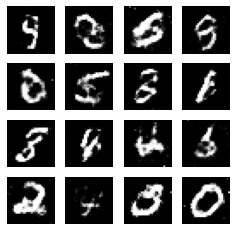


-------------------------------------------------------------

Epoch [68/100]
Before training:


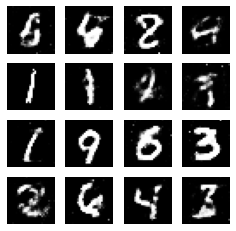

Batch [1/938], D Loss: 1.1948, G Loss: 1.1891
Batch [129/938], D Loss: 1.2146, G Loss: 1.0469
Batch [257/938], D Loss: 1.2922, G Loss: 1.1371
Batch [385/938], D Loss: 1.2561, G Loss: 1.2376
Batch [513/938], D Loss: 1.1872, G Loss: 0.9751
Batch [641/938], D Loss: 1.1724, G Loss: 1.0256
Batch [769/938], D Loss: 1.1439, G Loss: 1.0403
Batch [897/938], D Loss: 1.2248, G Loss: 0.9678
After training:


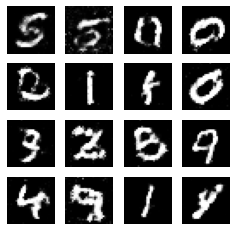


-------------------------------------------------------------

Epoch [69/100]
Before training:


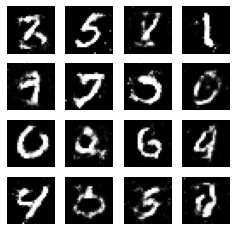

Batch [1/938], D Loss: 0.9696, G Loss: 1.2152
Batch [129/938], D Loss: 1.2961, G Loss: 0.8379
Batch [257/938], D Loss: 1.1104, G Loss: 1.2990
Batch [385/938], D Loss: 1.3174, G Loss: 1.0082
Batch [513/938], D Loss: 1.2697, G Loss: 0.9769
Batch [641/938], D Loss: 1.0794, G Loss: 1.1406
Batch [769/938], D Loss: 1.3708, G Loss: 0.9776
Batch [897/938], D Loss: 1.1607, G Loss: 1.1557
After training:


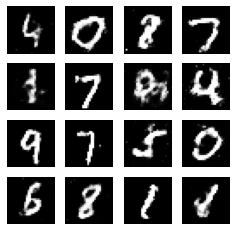


-------------------------------------------------------------

Epoch [70/100]
Before training:


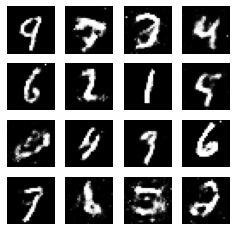

Batch [1/938], D Loss: 1.3258, G Loss: 0.8387
Batch [129/938], D Loss: 1.2929, G Loss: 1.1020
Batch [257/938], D Loss: 1.2654, G Loss: 0.9162
Batch [385/938], D Loss: 1.2188, G Loss: 1.0663
Batch [513/938], D Loss: 1.1212, G Loss: 1.1488
Batch [641/938], D Loss: 1.1562, G Loss: 1.1158
Batch [769/938], D Loss: 1.2410, G Loss: 1.0140
Batch [897/938], D Loss: 1.1783, G Loss: 1.0241
After training:


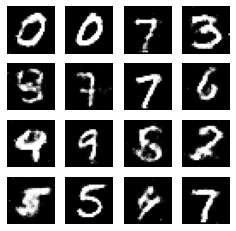


-------------------------------------------------------------

Epoch [71/100]
Before training:


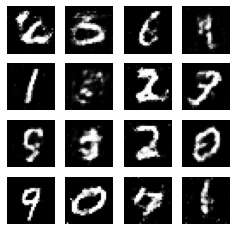

Batch [1/938], D Loss: 1.1333, G Loss: 1.1693
Batch [129/938], D Loss: 1.2108, G Loss: 1.0938
Batch [257/938], D Loss: 1.1366, G Loss: 1.2613
Batch [385/938], D Loss: 1.2310, G Loss: 1.1616
Batch [513/938], D Loss: 1.1430, G Loss: 1.0189
Batch [641/938], D Loss: 1.0799, G Loss: 1.1065
Batch [769/938], D Loss: 1.2488, G Loss: 1.1498
Batch [897/938], D Loss: 1.2090, G Loss: 1.1344
After training:


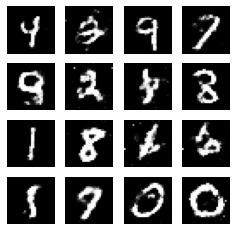


-------------------------------------------------------------

Epoch [72/100]
Before training:


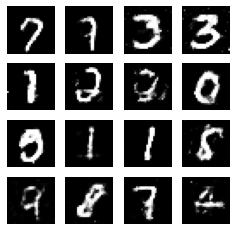

Batch [1/938], D Loss: 1.1135, G Loss: 1.0054
Batch [129/938], D Loss: 1.0976, G Loss: 1.0127
Batch [257/938], D Loss: 1.1502, G Loss: 1.2113
Batch [385/938], D Loss: 1.0967, G Loss: 0.9839
Batch [513/938], D Loss: 1.3320, G Loss: 0.7892
Batch [641/938], D Loss: 1.2001, G Loss: 0.9688
Batch [769/938], D Loss: 1.3532, G Loss: 0.9837
Batch [897/938], D Loss: 1.2029, G Loss: 0.8820
After training:


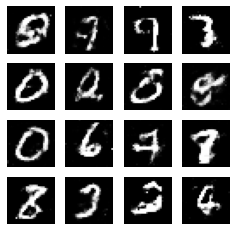


-------------------------------------------------------------

Epoch [73/100]
Before training:


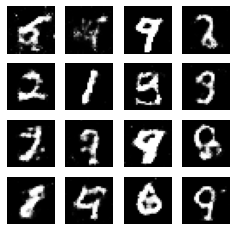

Batch [1/938], D Loss: 1.1705, G Loss: 0.8447
Batch [129/938], D Loss: 1.1799, G Loss: 0.9797
Batch [257/938], D Loss: 1.0513, G Loss: 0.9872
Batch [385/938], D Loss: 1.3112, G Loss: 1.1023
Batch [513/938], D Loss: 1.0390, G Loss: 1.0664
Batch [641/938], D Loss: 1.2998, G Loss: 0.9309
Batch [769/938], D Loss: 1.1586, G Loss: 1.1101
Batch [897/938], D Loss: 1.1597, G Loss: 0.9304
After training:


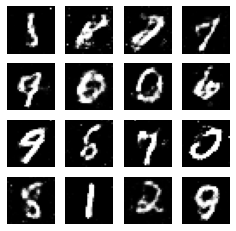


-------------------------------------------------------------

Epoch [74/100]
Before training:


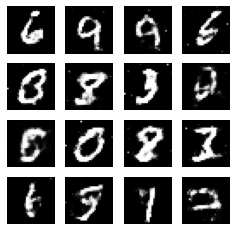

Batch [1/938], D Loss: 1.1712, G Loss: 1.1275
Batch [129/938], D Loss: 1.3814, G Loss: 0.8227
Batch [257/938], D Loss: 1.3107, G Loss: 0.9446
Batch [385/938], D Loss: 1.2150, G Loss: 1.2913
Batch [513/938], D Loss: 1.0745, G Loss: 1.0727
Batch [641/938], D Loss: 1.1599, G Loss: 1.0774
Batch [769/938], D Loss: 1.1472, G Loss: 0.9665
Batch [897/938], D Loss: 1.1835, G Loss: 1.2044
After training:


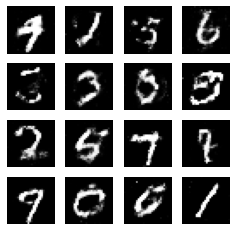


-------------------------------------------------------------

Epoch [75/100]
Before training:


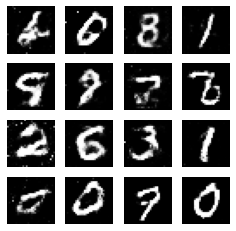

Batch [1/938], D Loss: 1.1320, G Loss: 1.0033
Batch [129/938], D Loss: 1.0937, G Loss: 1.2112
Batch [257/938], D Loss: 1.2379, G Loss: 1.0857
Batch [385/938], D Loss: 1.3381, G Loss: 0.8520
Batch [513/938], D Loss: 1.2326, G Loss: 1.1329
Batch [641/938], D Loss: 1.2759, G Loss: 1.0280
Batch [769/938], D Loss: 1.2844, G Loss: 1.0080
Batch [897/938], D Loss: 1.2649, G Loss: 0.8190
After training:


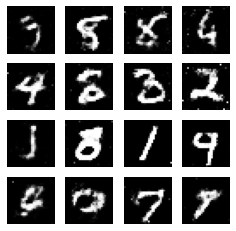


-------------------------------------------------------------

Epoch [76/100]
Before training:


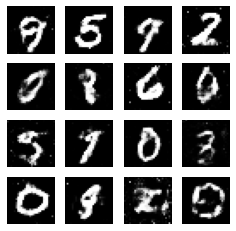

Batch [1/938], D Loss: 1.1414, G Loss: 1.0685
Batch [129/938], D Loss: 1.3466, G Loss: 0.9379
Batch [257/938], D Loss: 1.1563, G Loss: 1.2464
Batch [385/938], D Loss: 1.3104, G Loss: 0.9533
Batch [513/938], D Loss: 1.2770, G Loss: 0.9739
Batch [641/938], D Loss: 0.9875, G Loss: 1.1589
Batch [769/938], D Loss: 1.2261, G Loss: 0.8781
Batch [897/938], D Loss: 1.1899, G Loss: 1.0407
After training:


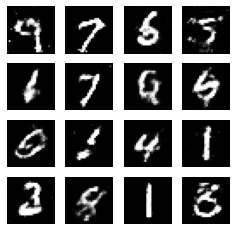


-------------------------------------------------------------

Epoch [77/100]
Before training:


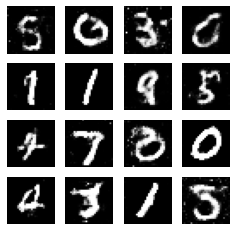

Batch [1/938], D Loss: 1.3693, G Loss: 1.0480
Batch [129/938], D Loss: 1.0965, G Loss: 1.3494
Batch [257/938], D Loss: 1.2627, G Loss: 0.9164
Batch [385/938], D Loss: 1.2495, G Loss: 1.0119
Batch [513/938], D Loss: 1.1800, G Loss: 1.0801
Batch [641/938], D Loss: 1.1206, G Loss: 1.1681
Batch [769/938], D Loss: 1.2931, G Loss: 1.0198
Batch [897/938], D Loss: 1.1415, G Loss: 1.0184
After training:


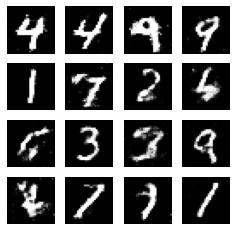


-------------------------------------------------------------

Epoch [78/100]
Before training:


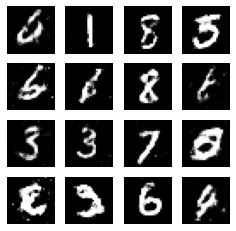

Batch [1/938], D Loss: 1.2347, G Loss: 1.3481
Batch [129/938], D Loss: 1.2185, G Loss: 0.9827
Batch [257/938], D Loss: 1.1399, G Loss: 1.0175
Batch [385/938], D Loss: 1.0301, G Loss: 0.9276
Batch [513/938], D Loss: 1.1006, G Loss: 1.1469
Batch [641/938], D Loss: 1.2754, G Loss: 1.0593
Batch [769/938], D Loss: 1.2275, G Loss: 1.0639
Batch [897/938], D Loss: 1.1711, G Loss: 1.0950
After training:


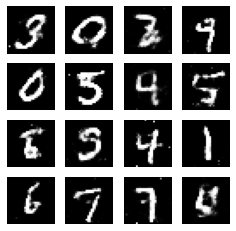


-------------------------------------------------------------

Epoch [79/100]
Before training:


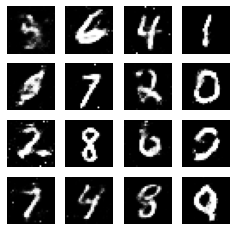

Batch [1/938], D Loss: 1.2834, G Loss: 1.0658
Batch [129/938], D Loss: 1.0966, G Loss: 1.1273
Batch [257/938], D Loss: 1.2642, G Loss: 1.0403
Batch [385/938], D Loss: 1.1537, G Loss: 1.2144
Batch [513/938], D Loss: 1.0840, G Loss: 1.0141
Batch [641/938], D Loss: 1.2573, G Loss: 1.0823
Batch [769/938], D Loss: 1.0592, G Loss: 1.3186
Batch [897/938], D Loss: 1.3807, G Loss: 0.9252
After training:


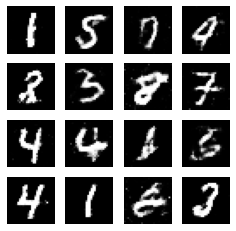


-------------------------------------------------------------

Epoch [80/100]
Before training:


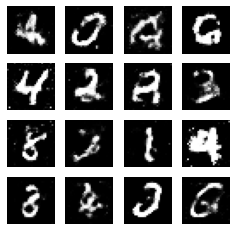

Batch [1/938], D Loss: 1.0947, G Loss: 1.1673
Batch [129/938], D Loss: 1.2075, G Loss: 0.9039
Batch [257/938], D Loss: 1.0818, G Loss: 1.2317
Batch [385/938], D Loss: 1.2639, G Loss: 1.1571
Batch [513/938], D Loss: 1.2512, G Loss: 0.9470
Batch [641/938], D Loss: 1.1420, G Loss: 1.1604
Batch [769/938], D Loss: 1.2541, G Loss: 1.0442
Batch [897/938], D Loss: 1.2825, G Loss: 1.1352
After training:


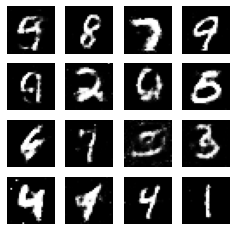


-------------------------------------------------------------

Epoch [81/100]
Before training:


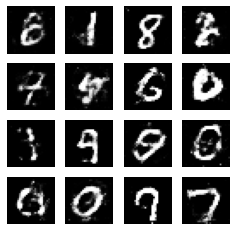

Batch [1/938], D Loss: 1.1780, G Loss: 1.1896
Batch [129/938], D Loss: 1.1128, G Loss: 1.0984
Batch [257/938], D Loss: 1.0505, G Loss: 0.9419
Batch [385/938], D Loss: 1.2927, G Loss: 0.9581
Batch [513/938], D Loss: 1.2546, G Loss: 1.0244
Batch [641/938], D Loss: 1.1752, G Loss: 1.3178
Batch [769/938], D Loss: 1.1438, G Loss: 0.9479
Batch [897/938], D Loss: 1.2126, G Loss: 0.9686
After training:


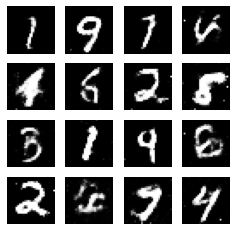


-------------------------------------------------------------

Epoch [82/100]
Before training:


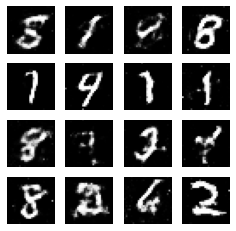

Batch [1/938], D Loss: 1.2717, G Loss: 1.0527
Batch [129/938], D Loss: 1.2734, G Loss: 0.7784
Batch [257/938], D Loss: 1.3164, G Loss: 1.0489
Batch [385/938], D Loss: 1.1666, G Loss: 1.0836
Batch [513/938], D Loss: 1.0726, G Loss: 1.1553
Batch [641/938], D Loss: 1.1544, G Loss: 1.1261
Batch [769/938], D Loss: 1.3295, G Loss: 0.9312
Batch [897/938], D Loss: 1.3195, G Loss: 0.9554
After training:


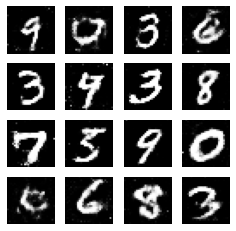


-------------------------------------------------------------

Epoch [83/100]
Before training:


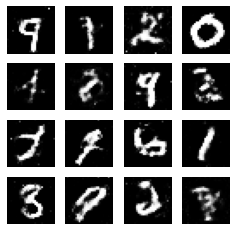

Batch [1/938], D Loss: 1.3782, G Loss: 0.8012
Batch [129/938], D Loss: 1.2068, G Loss: 1.0334
Batch [257/938], D Loss: 0.9558, G Loss: 1.0851
Batch [385/938], D Loss: 1.0785, G Loss: 1.2950
Batch [513/938], D Loss: 1.3737, G Loss: 0.9198
Batch [641/938], D Loss: 1.1396, G Loss: 1.0858
Batch [769/938], D Loss: 1.0235, G Loss: 1.3481
Batch [897/938], D Loss: 1.2187, G Loss: 1.0776
After training:


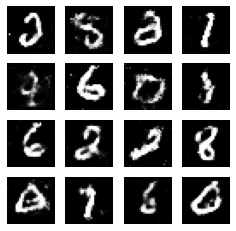


-------------------------------------------------------------

Epoch [84/100]
Before training:


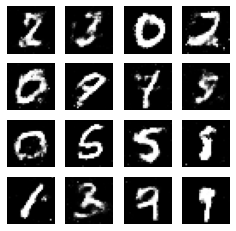

Batch [1/938], D Loss: 1.2123, G Loss: 1.0135
Batch [129/938], D Loss: 1.1409, G Loss: 0.9390
Batch [257/938], D Loss: 1.2051, G Loss: 1.1435
Batch [385/938], D Loss: 1.2432, G Loss: 0.9205
Batch [513/938], D Loss: 1.2149, G Loss: 1.0958
Batch [641/938], D Loss: 1.1338, G Loss: 1.1580
Batch [769/938], D Loss: 1.2772, G Loss: 0.8806
Batch [897/938], D Loss: 1.3214, G Loss: 1.0454
After training:


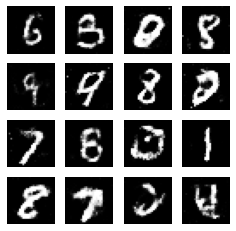


-------------------------------------------------------------

Epoch [85/100]
Before training:


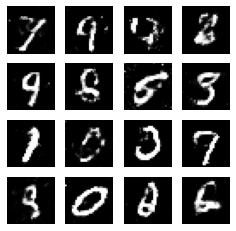

Batch [1/938], D Loss: 1.1729, G Loss: 1.0072
Batch [129/938], D Loss: 1.1259, G Loss: 1.3059
Batch [257/938], D Loss: 1.3001, G Loss: 0.8876
Batch [385/938], D Loss: 1.2678, G Loss: 1.0458
Batch [513/938], D Loss: 1.2166, G Loss: 1.0236
Batch [641/938], D Loss: 1.3910, G Loss: 0.9289
Batch [769/938], D Loss: 1.2001, G Loss: 0.9457
Batch [897/938], D Loss: 1.1301, G Loss: 1.0944
After training:


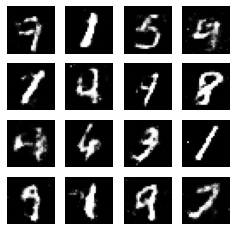


-------------------------------------------------------------

Epoch [86/100]
Before training:


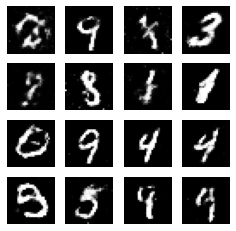

Batch [1/938], D Loss: 1.2065, G Loss: 0.9281
Batch [129/938], D Loss: 1.1767, G Loss: 1.0949
Batch [257/938], D Loss: 1.2622, G Loss: 1.0710
Batch [385/938], D Loss: 1.2978, G Loss: 0.7729
Batch [513/938], D Loss: 1.2567, G Loss: 1.0901
Batch [641/938], D Loss: 1.0327, G Loss: 1.0730
Batch [769/938], D Loss: 1.4030, G Loss: 0.8368
Batch [897/938], D Loss: 1.0568, G Loss: 1.1813
After training:


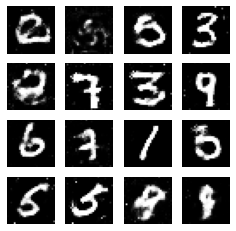


-------------------------------------------------------------

Epoch [87/100]
Before training:


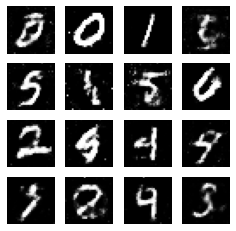

Batch [1/938], D Loss: 0.9478, G Loss: 1.1866
Batch [129/938], D Loss: 1.2951, G Loss: 1.1182
Batch [257/938], D Loss: 1.3141, G Loss: 0.8966
Batch [385/938], D Loss: 1.2335, G Loss: 1.2224
Batch [513/938], D Loss: 1.2254, G Loss: 0.9567
Batch [641/938], D Loss: 1.0550, G Loss: 1.0890
Batch [769/938], D Loss: 1.2097, G Loss: 1.0264
Batch [897/938], D Loss: 1.2082, G Loss: 1.0430
After training:


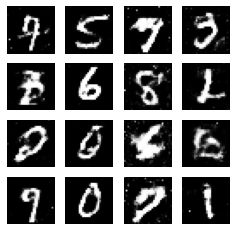


-------------------------------------------------------------

Epoch [88/100]
Before training:


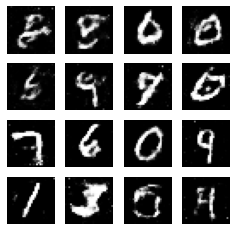

Batch [1/938], D Loss: 1.2819, G Loss: 0.9598
Batch [129/938], D Loss: 1.1972, G Loss: 0.9948
Batch [257/938], D Loss: 1.2641, G Loss: 0.9714
Batch [385/938], D Loss: 1.0817, G Loss: 1.2523
Batch [513/938], D Loss: 1.1520, G Loss: 1.1170
Batch [641/938], D Loss: 1.2553, G Loss: 0.9594
Batch [769/938], D Loss: 1.2171, G Loss: 0.9832
Batch [897/938], D Loss: 1.0962, G Loss: 1.1659
After training:


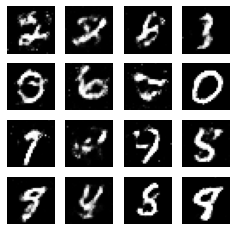


-------------------------------------------------------------

Epoch [89/100]
Before training:


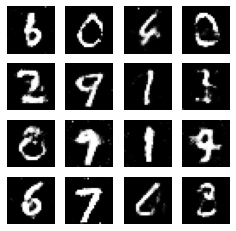

Batch [1/938], D Loss: 1.2291, G Loss: 1.2081
Batch [129/938], D Loss: 1.0330, G Loss: 1.2194
Batch [257/938], D Loss: 1.3395, G Loss: 1.0127
Batch [385/938], D Loss: 1.1087, G Loss: 1.1706
Batch [513/938], D Loss: 1.2338, G Loss: 0.9736
Batch [641/938], D Loss: 1.3111, G Loss: 0.9326
Batch [769/938], D Loss: 1.1383, G Loss: 0.9960
Batch [897/938], D Loss: 1.0720, G Loss: 1.4309
After training:


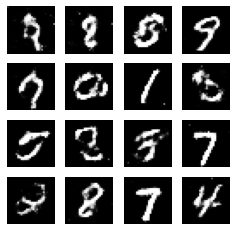


-------------------------------------------------------------

Epoch [90/100]
Before training:


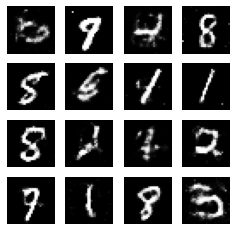

Batch [1/938], D Loss: 0.9375, G Loss: 1.2484
Batch [129/938], D Loss: 1.2319, G Loss: 1.0377
Batch [257/938], D Loss: 1.2910, G Loss: 0.9565
Batch [385/938], D Loss: 1.1093, G Loss: 0.9883
Batch [513/938], D Loss: 1.2171, G Loss: 0.8738
Batch [641/938], D Loss: 1.2948, G Loss: 1.0288
Batch [769/938], D Loss: 1.2320, G Loss: 1.0552
Batch [897/938], D Loss: 1.2254, G Loss: 0.9682
After training:


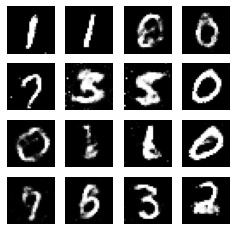


-------------------------------------------------------------

Epoch [91/100]
Before training:


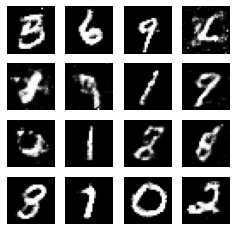

Batch [1/938], D Loss: 1.2553, G Loss: 0.9338
Batch [129/938], D Loss: 1.3280, G Loss: 1.1824
Batch [257/938], D Loss: 1.0597, G Loss: 1.0102
Batch [385/938], D Loss: 1.3950, G Loss: 1.0317
Batch [513/938], D Loss: 1.1018, G Loss: 1.0888
Batch [641/938], D Loss: 1.3096, G Loss: 1.0123
Batch [769/938], D Loss: 1.2092, G Loss: 0.9433
Batch [897/938], D Loss: 1.0435, G Loss: 1.1612
After training:


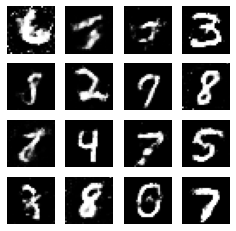


-------------------------------------------------------------

Epoch [92/100]
Before training:


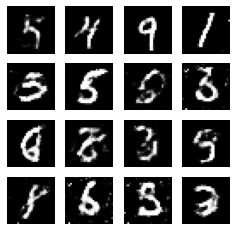

Batch [1/938], D Loss: 1.2180, G Loss: 1.0985
Batch [129/938], D Loss: 1.2318, G Loss: 0.8564
Batch [257/938], D Loss: 1.1165, G Loss: 0.9906
Batch [385/938], D Loss: 1.2314, G Loss: 1.2510
Batch [513/938], D Loss: 1.3347, G Loss: 0.9415
Batch [641/938], D Loss: 1.1393, G Loss: 1.0958
Batch [769/938], D Loss: 1.4643, G Loss: 0.8471
Batch [897/938], D Loss: 1.1246, G Loss: 1.0943
After training:


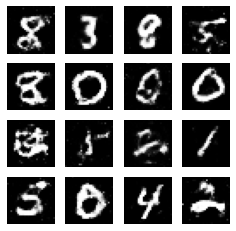


-------------------------------------------------------------

Epoch [93/100]
Before training:


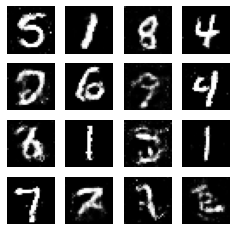

Batch [1/938], D Loss: 1.2824, G Loss: 0.8601
Batch [129/938], D Loss: 1.1951, G Loss: 1.0640
Batch [257/938], D Loss: 1.4695, G Loss: 0.8989
Batch [385/938], D Loss: 1.1190, G Loss: 1.1358
Batch [513/938], D Loss: 1.2073, G Loss: 1.1682
Batch [641/938], D Loss: 1.1297, G Loss: 1.0307
Batch [769/938], D Loss: 1.1131, G Loss: 1.0796
Batch [897/938], D Loss: 1.3381, G Loss: 0.8724
After training:


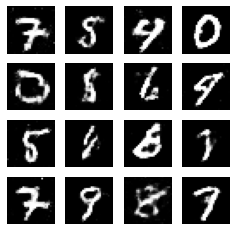


-------------------------------------------------------------

Epoch [94/100]
Before training:


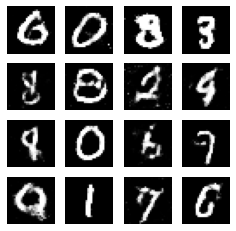

Batch [1/938], D Loss: 1.3337, G Loss: 1.1404
Batch [129/938], D Loss: 1.1527, G Loss: 1.1404
Batch [257/938], D Loss: 1.2143, G Loss: 1.1467
Batch [385/938], D Loss: 1.1600, G Loss: 1.2055
Batch [513/938], D Loss: 1.3640, G Loss: 0.9347
Batch [641/938], D Loss: 1.1506, G Loss: 1.1629
Batch [769/938], D Loss: 1.2395, G Loss: 1.1739
Batch [897/938], D Loss: 1.1364, G Loss: 1.1551
After training:


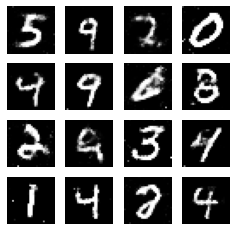


-------------------------------------------------------------

Epoch [95/100]
Before training:


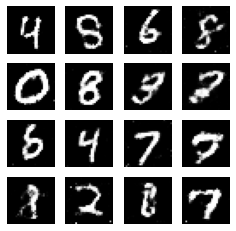

Batch [1/938], D Loss: 1.3089, G Loss: 1.1616
Batch [129/938], D Loss: 1.2987, G Loss: 0.9520
Batch [257/938], D Loss: 1.2624, G Loss: 0.9642
Batch [385/938], D Loss: 1.1027, G Loss: 1.2035
Batch [513/938], D Loss: 1.4231, G Loss: 0.8856
Batch [641/938], D Loss: 1.1731, G Loss: 1.0625
Batch [769/938], D Loss: 1.1495, G Loss: 0.9865
Batch [897/938], D Loss: 1.2468, G Loss: 0.9566
After training:


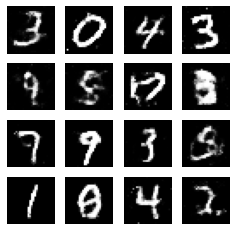


-------------------------------------------------------------

Epoch [96/100]
Before training:


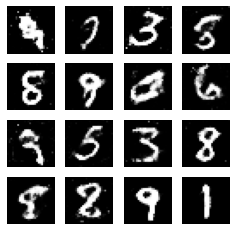

Batch [1/938], D Loss: 1.2477, G Loss: 0.8437
Batch [129/938], D Loss: 1.2368, G Loss: 0.9500
Batch [257/938], D Loss: 1.3004, G Loss: 1.1052
Batch [385/938], D Loss: 1.3659, G Loss: 0.9337
Batch [513/938], D Loss: 1.1154, G Loss: 1.1538
Batch [641/938], D Loss: 1.1976, G Loss: 1.0635
Batch [769/938], D Loss: 1.2557, G Loss: 0.9759
Batch [897/938], D Loss: 1.0827, G Loss: 1.1243
After training:


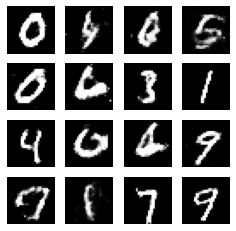


-------------------------------------------------------------

Epoch [97/100]
Before training:


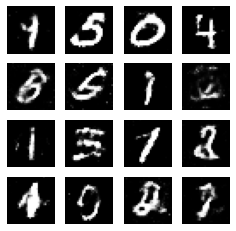

Batch [1/938], D Loss: 1.1440, G Loss: 0.8823
Batch [129/938], D Loss: 1.3511, G Loss: 0.8450
Batch [257/938], D Loss: 1.0021, G Loss: 1.3143
Batch [385/938], D Loss: 1.2819, G Loss: 1.2539
Batch [513/938], D Loss: 1.2734, G Loss: 1.0382
Batch [641/938], D Loss: 1.1908, G Loss: 1.2101
Batch [769/938], D Loss: 1.2373, G Loss: 0.9280
Batch [897/938], D Loss: 1.1563, G Loss: 0.9564
After training:


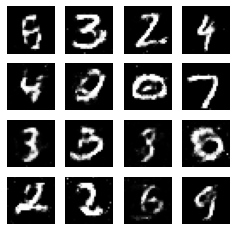


-------------------------------------------------------------

Epoch [98/100]
Before training:


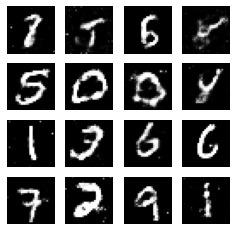

Batch [1/938], D Loss: 1.2525, G Loss: 1.1548
Batch [129/938], D Loss: 1.2527, G Loss: 0.8711
Batch [257/938], D Loss: 1.0761, G Loss: 1.2784
Batch [385/938], D Loss: 1.1698, G Loss: 1.0807
Batch [513/938], D Loss: 1.1854, G Loss: 1.1145
Batch [641/938], D Loss: 1.2417, G Loss: 1.0068
Batch [769/938], D Loss: 1.2808, G Loss: 0.8765
Batch [897/938], D Loss: 1.1396, G Loss: 0.9605
After training:


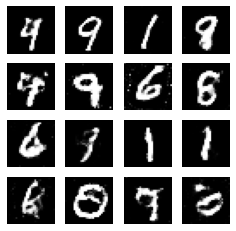


-------------------------------------------------------------

Epoch [99/100]
Before training:


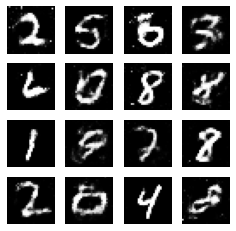

Batch [1/938], D Loss: 1.2177, G Loss: 0.9986
Batch [129/938], D Loss: 1.2553, G Loss: 0.9354
Batch [257/938], D Loss: 1.2719, G Loss: 0.9117
Batch [385/938], D Loss: 1.2213, G Loss: 1.0659
Batch [513/938], D Loss: 1.2585, G Loss: 0.9170
Batch [641/938], D Loss: 1.1346, G Loss: 1.1079
Batch [769/938], D Loss: 1.2948, G Loss: 1.0345
Batch [897/938], D Loss: 1.1216, G Loss: 0.8970
After training:


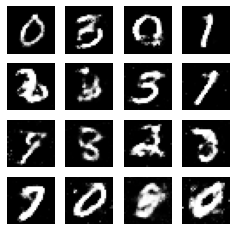


-------------------------------------------------------------

Epoch [100/100]
Before training:


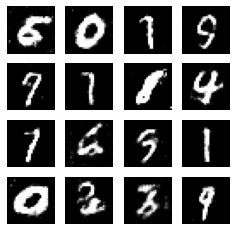

Batch [1/938], D Loss: 1.1429, G Loss: 1.0907
Batch [129/938], D Loss: 1.2013, G Loss: 0.8990
Batch [257/938], D Loss: 1.1068, G Loss: 1.3142
Batch [385/938], D Loss: 1.4661, G Loss: 0.8702
Batch [513/938], D Loss: 1.1323, G Loss: 1.0885
Batch [641/938], D Loss: 1.1160, G Loss: 1.0611
Batch [769/938], D Loss: 1.2511, G Loss: 1.0446
Batch [897/938], D Loss: 1.3584, G Loss: 0.9545
After training:


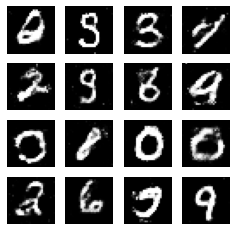


-------------------------------------------------------------

THE END!


In [7]:
# Initialize models
discriminator = Discriminator()
generator = Generator()

# Define binary cross entropy loss
criterion = nn.BCELoss()

# Track Loss
D_loss = []

# Number of epochs
num_epochs = 100

# Training loop
for epoch in range(num_epochs):
    print(f"Epoch [{epoch+1}/{num_epochs}]")
    print(f"Before training:")
    # Generate sample images before training
    with torch.no_grad():
        z = torch.randn(16, 100)
        generated_images = generator(z).view(-1, 28, 28)
        plt.figure(figsize=(4, 4))
        for i in range(16):
            plt.subplot(4, 4, i+1)
            plt.imshow(generated_images[i], cmap='gray')
            plt.axis('off')
        plt.show()

    # Initialize optimizers
    d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0003)
    g_optimizer = optim.Adam(generator.parameters(), lr=0.0003)

    # Train discriminator and generator
    for batch_idx, (real_images, _) in enumerate(train_loader):
        batch_size = real_images.size(0)
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)

        # Train discriminator
        d_optimizer.zero_grad()
        real_outputs = discriminator(real_images)
        real_loss = criterion(real_outputs, real_labels)
        
        z = torch.randn(batch_size, 100)
        fake_images = generator(z)
        fake_outputs = discriminator(fake_images.detach())
        fake_loss = criterion(fake_outputs, fake_labels)
        
        d_loss = real_loss + fake_loss
        d_loss.backward()
        d_optimizer.step()

        # Train generator
        g_optimizer.zero_grad()
        fake_outputs = discriminator(fake_images)
        g_loss = criterion(fake_outputs, real_labels)
        g_loss.backward()
        g_optimizer.step()

        if batch_idx % 128 == 0:
            print(f"Batch [{batch_idx+1}/{len(train_loader)}], D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")
        
        D_loss.append(round(d_loss.item(), 4))
        D_loss.append(round(g_loss.item(), 4))
        
    # Generate sample images after training
    print(f"After training:")
    with torch.no_grad():
        z = torch.randn(16, 100)
        generated_images = generator(z).view(-1, 28, 28)
        plt.figure(figsize=(4, 4))
        for i in range(16):
            plt.subplot(4, 4, i+1)
            plt.imshow(generated_images[i], cmap='gray')
            plt.axis('off')
        plt.show()
        
    print(f"\n-------------------------------------------------------------\n")

print("THE END!")

Initial training epochs show the generator learning basic digit structures, with improvements visible in image quality and reduction in discriminator error as training progresses.  
The discriminator's loss is calculated as the sum of the losses from identifying fake and real images. Initially trained on real images to establish a baseline, it later adapitates to the increasing complexity of the generated images.  
The project also explored slight modifications in the generator's output to successfully fool the discriminator, highlighting interesting aspects of adversarial training.  


 **Observation:** 
 - A fascinating observation emerged during the initial training steps of the GAN model. It appears that the generator network quickly discovers that to effectively deceive the discriminator, it must focus on manipulating the center pixels of the images. Moreover, the generator seems to prioritize generating numbers like 8, 3, and 9, which are more complex and have more distinctive features. This suggests that the generator is learning to exploit the discriminator's weaknesses by targeting the most critical regions of the images.

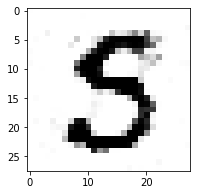

In [8]:
plt.figure(figsize=(3,3))
plt.imshow(generator(torch.randn(batch_size, 100)).view(32,28,28)[0].detach().numpy(), cmap='gist_gray_r')

In [9]:
G_LOSS = D_loss[1::2]
D_LOSS = D_loss[0::2]

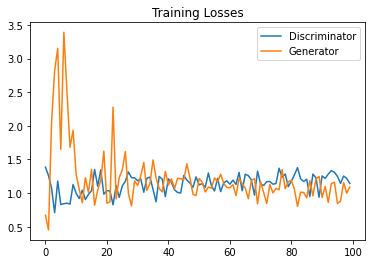

In [10]:
plt.plot(D_LOSS[::938], label='Discriminator')
plt.plot(G_LOSS[::938], label='Generator')
plt.title("Training Losses")
plt.legend();

### ***Loss Functions in GAN***


**Discriminator Loss (Loss D)**


The discriminator's goal is to correctly classify real images as real and generated images as fake. Loss $D$ quantifies the discriminator's ability to distinguish between real and fake images. It is computed using *binary cross-entropy (BCE)*, which is a common loss function for binary classification problems.

The formula for the discriminator's loss when training on real images is: 
$$Loss_{D_{real}}=−log⁡(D(x))$$ 
Where $D(x)$ is the discriminator's estimate of the probability that real data instance $x$ is real. Ideally, $D(x)$ should be close to `1`, meaning the discriminator recognizes real images accurately.

When training on generated images, the loss is: 
$$Loss_{D_{fake}}= −log⁡(1−D(G(z)))$$
Here, $G(z)$ represents the generated images from the generator's output on input noise $z$, and $D(G(z))$ is the discriminator's estimate of the probability that a generated image is real. Ideally, $D(G(z))$ should be close to `0`, indicating the discriminator can effectively identify fake images.

The total loss for the discriminator is the sum of the losses from real and generated images: 

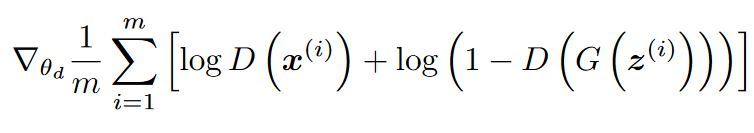

**Generator Loss (Loss G)**

The generator's objective is to fool the discriminator into classifying the fake images it generates as real. The Loss $G$ measures how well the generator is performing in deceiving the discriminator. It is also calculated using *binary cross-entropy*.

The formula for the generator's loss is: 
$$Loss_G = −log⁡(D(G(z)))$$
For the generator, $D(G(z))$ should ideally be close to `1`, which means the discriminator is misclassifying the fake images as real, indicating the generator is performing well.

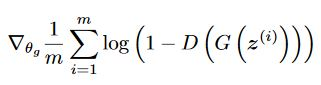